# Analyse von ÖV- und Wetterdaten

---
# 1 Einleitung

Zuverlässigkeit und Pünktlichkeit sind entscheidende Qualitätsmerkmale des öffentlichen Verkehrs. Gerade in einer Stadt wie Zürich, in der das Tramnetz einen wichtigen Bestandteil des städtischen Mobilitätsangebots darstellt, können Verspätungen zu spürbaren Einschränkungen im Alltag der Bevölkerung führen. Neben betrieblichen und infrastrukturellen Faktoren wird vermutet, dass auch das Wetter - wie etwa Regen, Schnee, Sonneneinstrahlung oder Temperaturschwankungen - eine wesentliche Rolle bei der Entstehung von Verspätungen spielt.

Im Rahmen der Projektarbeit im Modul "Business Intelligence and Business Analytics" soll untersucht werden, ob und inwieweit das Wetter die Pünktlichkeit des Trambetriebs in der Stadt Zürich im Zeitraum von Januar 2023 bis Dezember 2024 beeinflusst hat. Dabei soll nicht nur geprüft werden, ob es statistisch signifikante Zusammenhänge gibt, sondern auch, welche Wetterphänomene besonders ausschlaggebend sind und ob sich daraus Muster für zukünftige Entwicklungen ableiten lassen.

Die Analyse erfolgt datenbasiert und verknüpft Fahrplandaten der Zürcher Verkehrsbetriebe mit meteorologischen Informationen. Ziel ist es, eine fundierte Grundlage für eine Handlungsempfehlung auf Managementebene zu schaffen, die zur Verbesserung der Betriebsführung beitragen kann.

## 1.1 Zielsetzung und Forschungsfragen

Das Hauptziel dieser Arbeit besteht darin, den Einfluss verschiedener Wetterbedingungen auf die Pünktlichkeit des Trambetriebs in der Stadt Zürich systematisch zu analysieren. Durch den Vergleich von Wetter- und Verspätungsdaten für den Zeitraum 2024 sollen belastbare Aussagen darüber getroffen werden, ob und wann wetterbedingte Beeinträchtigungen auftreten.

Folgende Forschungsfragen stehen dabei im Mittelpunkt:
- Lassen sich statistisch signifikante Zusammenhänge zwischen bestimmten Wetterereignissen und ÖV-Verbindungen identifizieren?
- Welche Wetterfaktoren haben den grössten Einfluss auf die Pünktlichkeit?
- In welchen Zeiträumen oder auf welchen Linien treten wetterbedingte Verspätungen häufig auf?
- Welche praktische Empfehlungen lassen sich aus den - Ergebnissen für die betriebliche Planung und Steuerung ableiten?
- ...?

## 1.2 Methodisches Vorgehen

Das Vorgehen in dieser Arbeit orientiert sich am fünfstufigen Framework zur datenbasierten Entscheidungsfindung nach Bernhard Marr (2020). Es umfasst die Definition des Informationsbedarfs, die Erhebung und Aufbereitung der relevanten Daten, die Durchführung der Analyse sowie die Darstellung der Ergebnisse.

Im ersten Schritt werden die Ziele und der Informationsbedarf anhand der definierten Forschungsfragen bestimmt (Kapitel 1.1).

In Kapitel 2 werden die verwendeten Datenquellen vorgestellt, die Datenqualität überprüft und der Prozess der Datenaufbereitung beschrieben. Dabei werden die Wetterdaten der Stadt Zürich und die ÖV-Betriebsdaten des Zürcher Verkehrsbetriebs berücksichtigt.

In Kapitel 3 erfolgt die Analyse der Daten, wobei verschiedene statistische Verfahren und Methoden zur Aufdeckung von Zusammenhängen und Mustern eingesetzt werden.

Die gewonnenen Erkenntnisse werden in Kapitel 4 in Form von Visualisierungen und einer managementgerechten Ergebnisdarstellung aufbereitet.

Ziel ist es, am Ende der Arbeit eine fundierte Datenbasis und erste Handlungsempfehlungen zur Verfügung zu stellen, die als Grundlage für zukünftige Optimierungsmassnahmen des öffentlichen Verkehrs der Stadt Zürich dienen können.

---
# 2 Daten
Für die Durchführung der Analyse wurden zwei zentrale Datenquellen kombiniert: Verkehrsdaten der Zürcher Trambetriebe sowie meteorologische Daten aus dem Raum Zürich. Beide Datensätze wurden aus offiziellen, öffentlich zugänglichen Plattformen bezogen und decken den Zeitraum von Januar 2023 bis Dezember 2024 ab.

Neben der Beschreibung der verwendeten Datenquellen (Abschnitt 2.1) wird in Abschnitt 2.2 das Vorgehen beim Import, der Bereinigung und Transformation der Daten erläutert. Ziel ist es, eine konsistente und qualitativ hochwertige Datenbasis für die Analyse zu schaffen.

## 2.1 Quellen
Es wurden zwei Hauptdatenquellen verwendet, wobei beide Datensätze so ausgewählt wurden, dass sie in Bezug auf Zeitbezug und räumliche Relevanz miteinander verknüpft werden können.

### 2.1.1 Verkehrsdaten
In dieser Arbeit werden zwei offizielle und öffentlich zugängliche Datensätze zum öffentlichen Verkehr in der Schweiz verwendet.
Die Daten rund um die Abfahrts- und Ankunftszeiten der Verkehrsmittel stammen von der Open-Data Plattform opentransportdata.swiss. Diese Plattform wird vom Bundesamt für Verkehr unterstützt und stellt aktuelle sowie historische Daten zum öffentlichen Verkehr zur Verfügung.
Quelle: (https://archive.opentransportdata.swiss/actual_data_archive.htm)

Zusätzlich wurden Geodaten zu den Haltestellen des öffentlichen Verkehrs verwendet. Diese wurden direkt über die Website des Bundesamts für Verkehr (BAV) bezogen. Der Datensatz enthält unter anderem die geografischen Koordinaten (Landeskoordinaten LV95), Haltestellennamen, sowie Gemeindezugehörigkeiten. Diese Informationen ermöglichen eine räumliche Visualisierung der Haltestellen.
Quelle: https://www.bav.admin.ch/bav/de/home/allgemeine-themen/fachthemen/geoinformation/geobasisdaten/haltestellen-des-oeffentlichen-verkehrs.html


### 2.1.2 Wetter
Die Wetterdaten wurden vom Datenportal IDAweb von MeteoSchweiz bezogen. Das Portal bietet Universitäten, (Fach-)Hochschulen und Schulen die Möglichkeit, Bodenstationsdaten von MeteoSchweiz zu beziehen.
Quelle: (https://gate.meteoswiss.ch/idaweb)

Symvble

ℹ️ Begründungen oder Informationen
⚠️ Ausführungsrelevante Warnung
💾 Speichern

# 3 Import, Bereinigung und Transformation der Daten

In einem ersten Schritt werden die Python-Bibliotheken für die Verarbeitung, Analyse und Visualisierung der Daten geladen.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from tqdm import tqdm #Package für Fortschrittsbalken
from keplergl import KeplerGl #Package für Darstellung von Geodaten
import calplot
import os
import glob
from scipy.stats import pearsonr
from scipy.stats import pointbiserialr


## 3.1 Verkehrsdaten

### 3.1.1 Import der Verkehrsdaten

Ein einzelner Verkehrsdatensatz (01.01.2024) wird eingelesen und als Grundlage für die anschliessende Datenbereinigung verwendet.

In [2]:
# 1. Laden der CSV-Datei
df_verkehr_daily_raw = pd.read_csv("Verkehrsdaten_daily.csv",
                                   sep=";",
                                   encoding="utf-8",
                                   low_memory=False)

# 2. Anzeigen der ersten 5 Zeilen des DataFrames
display(df_verkehr_daily_raw.head(5))

# 3. Anzeigen der Informationen des DataFrames
df_verkehr_daily_raw.info()

# 4. Anzeigen der Dimensionen des DataFrames
print(df_verkehr_daily_raw.shape)

,BETRIEBSTAG,FAHRT_BEZEICHNER,BETREIBER_ID,BETREIBER_ABK,BETREIBER_NAME,PRODUKT_ID,LINIEN_ID,LINIEN_TEXT,UMLAUF_ID,VERKEHRSMITTEL_TEXT,...,FAELLT_AUS_TF,BPUIC,HALTESTELLEN_NAME,ANKUNFTSZEIT,AN_PROGNOSE,AN_PROGNOSE_STATUS,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS,DURCHFAHRT_TF
0,01.01.2024,80:06____:17291:000,80:06____,DB,DB Regio AG Baden-Württemberg,Zug,17291,RB,NaN,RB,...,True,8500090,Basel Bad Bf,NaN,NaN,UNBEKANNT,01.01.2024 01:05,NaN,UNBEKANNT,False
1,01.01.2024,80:06____:70665:000,80:06____,DB,DB Regio AG Baden-Württemberg,Zug,70665,RB,NaN,RB,...,False,8500090,Basel Bad Bf,NaN,NaN,NaN,01.01.2024 01:05,01.01.2024 01:06:00,PROGNOSE,False
2,01.01.2024,80:800631:17238:000,80:800631,DB,DB Regio AG Baden-Württemberg,Zug,17238,RB,NaN,RB,...,False,8500090,Basel Bad Bf,01.01.2024 07:05,01.01.2024 07:05:00,PROGNOSE,NaN,NaN,NaN,False
3,01.01.2024,80:800631:17239:000,80:800631,DB,DB Regio AG Baden-Württemberg,Zug,17239,RB,NaN,RB,...,False,8500090,Basel Bad Bf,NaN,NaN,NaN,01.01.2024 07:53,01.01.2024 07:53:00,PROGNOSE,False
4,01.01.2024,80:800631:17241:000,80:800631,DB,DB Regio AG Baden-Württemberg,Zug,17241,RB,NaN,RB,...,False,8500090,Basel Bad Bf,NaN,NaN,NaN,01.01.2024 08:53,01.01.2024 08:54:00,PROGNOSE,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1501831 entries, 0 to 1501830
Data columns (total 21 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   BETRIEBSTAG          1501831 non-null  object
 1   FAHRT_BEZEICHNER     1501831 non-null  object
 2   BETREIBER_ID         1501831 non-null  object
 3   BETREIBER_ABK        1501831 non-null  object
 4   BETREIBER_NAME       1501831 non-null  object
 5   PRODUKT_ID           1501831 non-null  object
 6   LINIEN_ID            1501831 non-null  object
 7   LINIEN_TEXT          1501831 non-null  object
 8   UMLAUF_ID            688303 non-null   object
 9   VERKEHRSMITTEL_TEXT  1501831 non-null  object
 10  ZUSATZFAHRT_TF       1501831 non-null  bool  
 11  FAELLT_AUS_TF        1501831 non-null  bool  
 12  BPUIC                1501831 non-null  int64 
 13  HALTESTELLEN_NAME    1389616 non-null  object
 14  ANKUNFTSZEIT         1413665 non-null  object
 15  AN_PROGNOSE    

### 3.1.2 Datenbereinigung & Formatierung

Im Datensatz sind diverse Spalten enthalten, die für die Analyse keinen Mehrwert bieten oder redundante Informationen enthalten. Diese werden im folgenden Schritt entfernt, um die Datenstruktur zu vereinfachen und nur die relevanten Informationen beizubehalten. Nachfolgend wird dokumentiert wieso die einzelnen Spalten entfernt werden:

- **BETRIEBSTAG:** Das Datum ist bereits in der Ankunfts- und Abfahrtszeit enthalten
- **FAHRT_BEZEICHNER:** Für die weitere Analyse nicht relevant
- **BETREIBER_ID:** Ist nicht relevant da der Betreiber mit "BETREIBER_ABK" identifiziert wird
- **BETREIBER_NAME:** Ist nicht relevant da der Betreiber mit "BETREIBER_ABK" identifiziert wird
- **LINIEN_ID:** Ist nicht relevant da die Linie mit "LINIEN_TEXT" identifiziert wird.
- **UMLAUF_ID:** Für die weitere Analyse nicht relevant
- **VERKEHRSMITTEL_TEXT:** Ist nicht relevant da das Verkehrsmittel mit "PRODUKT_ID"identifiziert wird.
- **BPUIC:** Für die weitere Analyse nicht relevant
- **ANKUNFTSZEIT, AN_PROGNOSE, AN_PROGNOSE_STATUS:** Für die Analyse ist ausschliesslich die Abfahrtszeit relevant. Bei längeren Haltezeiten am Bahnhof können Verspätungen teilweise kompensiert werden, sodass die Abfahrt pünktlich erfolgt – die Ankunftszeit liefert daher kein verlässliches Bild für die Verspätungsanalyse.

In [3]:
# 1. Entfernen der Spalten, die nicht benötigt werden für die Analyse
df_verkehr_daily = df_verkehr_daily_raw.drop(columns=["BETRIEBSTAG", "FAHRT_BEZEICHNER",
                                                      "BETREIBER_ID", "BETREIBER_NAME",
                                                      "LINIEN_ID", "UMLAUF_ID",
                                                      "VERKEHRSMITTEL_TEXT", "BPUIC",
                                                      "ANKUNFTSZEIT", "AN_PROGNOSE",
                                                      "AN_PROGNOSE_STATUS"])

# 2. Anzeigen der ersten 5 Zeilen des Dataframes
display(df_verkehr_daily.head())

,BETREIBER_ABK,PRODUKT_ID,LINIEN_TEXT,ZUSATZFAHRT_TF,FAELLT_AUS_TF,HALTESTELLEN_NAME,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS,DURCHFAHRT_TF
0,DB,Zug,RB,True,True,Basel Bad Bf,01.01.2024 01:05,NaN,UNBEKANNT,False
1,DB,Zug,RB,True,False,Basel Bad Bf,01.01.2024 01:05,01.01.2024 01:06:00,PROGNOSE,False
2,DB,Zug,RB,False,False,Basel Bad Bf,NaN,NaN,NaN,False
3,DB,Zug,RB,False,False,Basel Bad Bf,01.01.2024 07:53,01.01.2024 07:53:00,PROGNOSE,False
4,DB,Zug,RB,False,False,Basel Bad Bf,01.01.2024 08:53,01.01.2024 08:54:00,PROGNOSE,False


In [4]:
# 1. Analyse der Spalteninhalte
print(df_verkehr_daily["PRODUKT_ID"].unique())
print(sorted(df_verkehr_daily["BETREIBER_ABK"].unique()))

print(df_verkehr_daily[df_verkehr_daily["BETREIBER_ABK"] == "VBZ"]["PRODUKT_ID"].unique())
print(df_verkehr_daily[df_verkehr_daily["BETREIBER_ABK"].str.contains("Fpl")]["PRODUKT_ID"].unique())

['Zug' 'Bus' 'Zahnradbahn' 'Metro' 'Schiff' 'Tram' 'BUS' 'WM-BUS']
['AAGL', 'AAGR', 'AAGS', 'AAGU', 'AB-ab', 'ABF', 'ABl', 'AFA', 'AMSA', 'ARAG', 'ARL', 'AS', 'ASL', 'ASM Auto', 'ASM-bti', 'ASM-rvo', 'ASM-snb', 'AVA-bd', 'AVA-ltb', 'AVA-wsb', 'AVA/Autwm', 'AVA/rbz', 'AVJ', 'AWA', 'BBA', 'BCS', 'BGU', 'BLAG', 'BLM', 'BLS-bls', 'BLS-ths', 'BLT-blt', 'BLWE', 'BNP', 'BOB', 'BOB Auto', 'BOGG', 'BOS/rtb', 'BOS/wimo', 'BOTG', 'BRER', 'BSU', 'BVB', 'BWS', 'BuS/cb', 'BuS/eb', 'CJ', 'CJ Auto', 'D', 'DB', 'DB Regio', 'FART', 'FART Auto', 'FB', 'FLP', 'FLX', 'GGB', 'JB', 'LEB', 'LLB', 'MBC', 'MBC Auto', 'MG', 'MGB-bvz', 'MGB-fo', 'MOB', 'MVR-cev', 'MVR-mtgn', 'NStCM', 'NeTS-ÖBB', 'PAG', 'RA', 'RA/bus', 'RB', 'RBL', 'RBS', 'RBS Auto', 'REGO', 'RVBW', 'RhB', 'SBB', 'SBB GmbH', 'SBW', 'SGV', 'SMC', 'SNL Auto', 'SOB-sob', 'STI', 'STI Berg', 'STI-gwb', 'SVB Auto', 'SZU', 'SZU Auto', 'THURBO', 'TL', 'TMR Auto', 'TMR-mc', 'TN', 'TPC', 'TPC Auto', 'TPF', 'TPF Auto', 'TPG', 'TPL', 'TPN', 'TRAVYS', 'TRAVYSA

In einem nächsten Schritt wird der reduzierte Tagesdatensatz nach Verkehrsmittel und Betreiber gefiltert. Anschliessend sind nur noch Datensätze enthalten, die sich auf Trams der Zürcher Verkehrsbetriebe (VBZ) beziehen. Nachdem das Ergebnis überprüft wurde, werden die beiden nicht mehr benötigten (homogenen) Spalten gelöscht.

In [5]:
# 1. Filterbedingungen definieren für den Betreiber und das Verkehrsmittel
filter_betreiber = df_verkehr_daily["BETREIBER_ABK"].str.contains("VBZ", na=False)
filter_produkt = df_verkehr_daily["PRODUKT_ID"].str.contains("Tram", na=False)

# 2. Dataframe filtern
df_verkehr_daily_filtered = df_verkehr_daily[filter_produkt & filter_betreiber]

# 3. Überprüfung der Spalteninhalte nach dem Filtern
print(df_verkehr_daily_filtered["BETREIBER_ABK"].unique())
print(df_verkehr_daily_filtered["PRODUKT_ID"].unique())

# 4. Gefilterte Spalten entfernen
df_verkehr_daily_filtered = (df_verkehr_daily_filtered.drop(columns=["BETREIBER_ABK", "PRODUKT_ID"]))

# 5. Anzeigen der ersten 5 Zeilen des gefilterten DataFrames
display(df_verkehr_daily_filtered.head())

['VBZ    Fpl']
['Tram']


,LINIEN_TEXT,ZUSATZFAHRT_TF,FAELLT_AUS_TF,HALTESTELLEN_NAME,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS,DURCHFAHRT_TF
262646,2,False,False,"Zürich,Kalkbreite/Bhf.Wiedikon",01.01.2024 04:51,01.01.2024 04:52:03,REAL,False
262647,2,False,False,"Zürich, Bezirksgebäude",01.01.2024 04:52,01.01.2024 04:53:27,REAL,False
262648,2,False,False,"Zürich, Stauffacher",01.01.2024 04:54,01.01.2024 04:55:26,REAL,False
262649,2,False,False,"Zürich, Sihlstrasse",01.01.2024 04:55,01.01.2024 04:57:26,REAL,False
262650,2,False,False,"Zürich, Paradeplatz",01.01.2024 04:57,01.01.2024 04:59:19,REAL,False


Die Verbleibenden Spalten werden auf ihren Inhalt und ihre Eigenschaften untersucht

In [6]:
# 1. Anzeigen aller verfügbaren Tramlinien im Dataframe
print("\n--- Verfügbare Tramlinien --------")
print(df_verkehr_daily_filtered["LINIEN_TEXT"].unique())

# 2. Berechnung prozentualler Anteil von FALSE und TRUE für Zusatzfahrten, Ausfälle und Durchfahrten
print("\n--- Anteil Zusatzfahrten --------")
print(df_verkehr_daily_filtered["ZUSATZFAHRT_TF"].value_counts(normalize=True).round(4))

print("\n--- Anteil Ausfälle --------")
print(df_verkehr_daily_filtered["FAELLT_AUS_TF"].value_counts(normalize=True).round(4))

print("\n--- Anteil Durchfahrten --------")
print(df_verkehr_daily_filtered["DURCHFAHRT_TF"].value_counts(normalize=True).round(4))

# 3. Anzeige aller verfügbaren Prognose Status im Dataframe
print("\n--- Verfügbare Prognose Status --------")
print(df_verkehr_daily_filtered["AB_PROGNOSE_STATUS"].value_counts())



--- Verfügbare Tramlinien --------
['2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '17']

--- Anteil Zusatzfahrten --------
ZUSATZFAHRT_TF
False    0.9743
True     0.0257
Name: proportion, dtype: float64

--- Anteil Ausfälle --------
FAELLT_AUS_TF
False    0.9474
True     0.0526
Name: proportion, dtype: float64

--- Anteil Durchfahrten --------
DURCHFAHRT_TF
False    1.0
Name: proportion, dtype: float64

--- Verfügbare Prognose Status --------
AB_PROGNOSE_STATUS
REAL          64953
PROGNOSE       1383
UNBEKANNT       147
GESCHAETZT      140
Name: count, dtype: int64


**Erkenntnisse** <br>
- Da die Spalten "ZUSATZFAHRTEN_TF", "FAELLT_AUS_TF" und "DURCHFAHRT_TF" nur eine sehr geringe Anzahl TRUE Werte enthalten (<0.5%) und diese Einträge keine relevanz für die Analyse der Verspätungszeiten haben werden diese Spalten nach FALSE gefiltert.
- Gemäss Dokumentation der Verkehrsdaten (https://opentransportdata.swiss/de/cookbook/actual-data/) sind nur die Prognose Status "REAL" und GESCHAETZT" für die Analyse relevant. Aus diesem Grudn werden die übrigen Werte herausgefiltert.

Nachfolgend werden die erwähnten Filterbedinungen auf den Dataframe angewendet.

In [7]:
# 1. Filterbedingungen definieren für Prognose Status
filter_status = df_verkehr_daily_filtered["AB_PROGNOSE_STATUS"].astype(str).str.contains("REAL|GESCHAETZT", na=False)

# 2. Filterbedingungen definieren für Zusatzfahrten, Ausfälle und Durchfahrten
filter_faellt_aus = df_verkehr_daily_filtered["FAELLT_AUS_TF"] == False
filter_zusatzfahrt = df_verkehr_daily_filtered["ZUSATZFAHRT_TF"] == False
filter_durchfahrt = df_verkehr_daily_filtered["DURCHFAHRT_TF"] == False

# 3. Dataframe filtern
df_verkehr_daily_filtered = df_verkehr_daily_filtered[filter_status & filter_faellt_aus & filter_zusatzfahrt & filter_durchfahrt]

# 4. Überprüfung der Spalteninhalte nach dem Filtern
print((df_verkehr_daily_filtered["AB_PROGNOSE_STATUS"].value_counts()), "\n")
print((df_verkehr_daily_filtered["ZUSATZFAHRT_TF"].value_counts()), "\n")
print((df_verkehr_daily_filtered["FAELLT_AUS_TF"].value_counts()), "\n")
print((df_verkehr_daily_filtered["DURCHFAHRT_TF"].value_counts()), "\n")

# 5. Gefilterte Spalten entfernen
df_verkehr_daily_filtered.drop(columns = ["ZUSATZFAHRT_TF", "FAELLT_AUS_TF", "DURCHFAHRT_TF"], inplace=True) # ℹ️ Der Prognose Status wird nicht entfernt da er ervtl in Zukunft wichtige Hinweise liefern könnte und eine erneute Filterung nötig wird.

# 6. Anzeigen der ersten 5 Zeilen des Dataframes
display(df_verkehr_daily_filtered.head())

AB_PROGNOSE_STATUS
REAL          61406
GESCHAETZT      119
Name: count, dtype: int64 

ZUSATZFAHRT_TF
False    61525
Name: count, dtype: int64 

FAELLT_AUS_TF
False    61525
Name: count, dtype: int64 

DURCHFAHRT_TF
False    61525
Name: count, dtype: int64 



,LINIEN_TEXT,HALTESTELLEN_NAME,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS
262646,2,"Zürich,Kalkbreite/Bhf.Wiedikon",01.01.2024 04:51,01.01.2024 04:52:03,REAL
262647,2,"Zürich, Bezirksgebäude",01.01.2024 04:52,01.01.2024 04:53:27,REAL
262648,2,"Zürich, Stauffacher",01.01.2024 04:54,01.01.2024 04:55:26,REAL
262649,2,"Zürich, Sihlstrasse",01.01.2024 04:55,01.01.2024 04:57:26,REAL
262650,2,"Zürich, Paradeplatz",01.01.2024 04:57,01.01.2024 04:59:19,REAL


Die Abfahrts- und Prognosezeiten werden in das Datetime Fomat umgewandelt um später mit den Verspätungen rechnen zu können.

In [8]:
# 1. Umwandeln der Abfahrzeiten und Prognosen in datetime Format
df_verkehr_daily_filtered["ABFAHRTSZEIT"] = pd.to_datetime(df_verkehr_daily_filtered["ABFAHRTSZEIT"]+ ":00", dayfirst=True)
df_verkehr_daily_filtered["AB_PROGNOSE"] = pd.to_datetime(df_verkehr_daily_filtered["AB_PROGNOSE"], dayfirst=True)

# 2. Überprüfung der Datentypen nach der Umwandlung
df_verkehr_daily_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61525 entries, 262646 to 332281
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   LINIEN_TEXT         61525 non-null  object        
 1   HALTESTELLEN_NAME   61525 non-null  object        
 2   ABFAHRTSZEIT        61525 non-null  datetime64[ns]
 3   AB_PROGNOSE         61525 non-null  datetime64[ns]
 4   AB_PROGNOSE_STATUS  61525 non-null  object        
dtypes: datetime64[ns](2), object(3)
memory usage: 2.8+ MB


### 3.1.3 Zusammenfügen der Tagesdatensätze zu einem Jahresdatensatz

Aus den erkenntnissen der Tagesdaten wird nachfolgend ein Code erstellt der die Datensätze von einem Jahr zusmmenführt. Dabei werden die gleichen Methoden wie oben angewendet

In [9]:
# Schutzzelle gegen versehentliche Ausführung
if False: # ⛔ Diese Zelle ist nur zur Dokumentation. Sie dauert 30 Minuten und sollte nicht erneut ausgeführt werden

    # ⚠️ Muss manuell angepasst werden vor dem Import
    # Ordnerpfad mit den CSV-Dateien
    ordner_pfad = "/Users/remofankhauser/Verkehrsdaten_2024"
    # ⚠️ --------------------------------------------

    # Alle CSV-Dateien im Ordner finden
    csv_dateien = glob.glob(os.path.join(ordner_pfad, "*.csv"))

    # Nur benötigte Spalten einlesen
    benötigte_spalten = [
        "BETREIBER_ABK", "PRODUKT_ID",
        "LINIEN_TEXT", "ZUSATZFAHRT_TF",
        "FAELLT_AUS_TF", "DURCHFAHRT_TF",
        "HALTESTELLEN_NAME", "ABFAHRTSZEIT",
        "AB_PROGNOSE", "AB_PROGNOSE_STATUS"
    ]

    # Liste zum Speichern der DataFrames
    df_list = []

    # Alle CSV-Dateien einlesen und filtern
    for datei in tqdm(csv_dateien, desc="🔍 CSV-Dateien einlesen"):
        df = pd.read_csv(datei, sep=";",
                        encoding="utf-8",
                        low_memory=False,
                        usecols=benötigte_spalten,
                        dtype={"LINIEN_TEXT": str} # ℹ️ Aus den Analysen der kombinierten Daten wurde ersichtlich, dass in gewissen Datensätzen auch nicht numerische Werte enthalten sind und darum eine Mischung aus Integer und String entsteht. Aus diesem Grudn wird diese Spalte direkt als String eingelesen.
    )
        # Filterbedingungen definieren und auf Dataframe anwenden
        df = df[
            (df["BETREIBER_ABK"].str.contains("VBZ", na=False)) &
            (df["AB_PROGNOSE_STATUS"].str.contains("REAL|GESCHAETZT", na=False)) &
            (df["PRODUKT_ID"].str.contains("Tram", na=False)) &
            (df["ZUSATZFAHRT_TF"] == False) &
            (df["FAELLT_AUS_TF"] == False) &
            (df["DURCHFAHRT_TF"] == False)
        ]

        # Nicht mehr benötigte Spalten entfernen
        df = df.drop(columns=["BETREIBER_ABK", "PRODUKT_ID", "ZUSATZFAHRT_TF", "FAELLT_AUS_TF", "DURCHFAHRT_TF"])

        df_list.append(df)

    # Alle gefilterten DataFrames zusammenführen
    if df_list:
        df_gesamt = pd.concat(df_list, ignore_index=True)
        df_gesamt = df_gesamt.sort_values(by="ABFAHRTSZEIT").reset_index(drop=True)

    # Datei lokal speichern
    speicherpfad = os.path.join(ordner_pfad, "Verkehrsdaten_2024.csv")
    df_gesamt.to_csv(speicherpfad, index=False, encoding="utf-8")

    print(f"✅ Daten gespeichert unter: {speicherpfad}")

### 3.1.4. Datenbereinigung & Formatierung der Jahresdaten

In [10]:
# 1. Import der zusammengeführten Tagesdaten -> Jahresdaten 2024
df_verkehr_2024_raw = pd.read_csv("Verkehrsdaten_2024.csv",
                                  sep=",",
                                  encoding="utf-8",
                                  low_memory=False) # ⚠️ Das csv File muss im Repository im Ordner Main abgelegt sein. Da es zu gross für Git ist wurde es in Gitignore aufgenommen und wird somit nicht hochgeladen.

# 2. Datumformat der Abfahrtszeiten und Prognosen anpassen
df_verkehr_2024_raw["ABFAHRTSZEIT"] = pd.to_datetime(df_verkehr_2024_raw["ABFAHRTSZEIT"], errors="coerce")
df_verkehr_2024_raw["AB_PROGNOSE"] = pd.to_datetime(df_verkehr_2024_raw["AB_PROGNOSE"], errors="coerce")

# 3. Anzeigen der ersten 5 Zeilen des DataFrames
display(df_verkehr_2024_raw.head())

# 4. Anzeigen der Informationen des DataFrames
df_verkehr_2024_raw.info()

# 5. Anzeige der Länge des Dataframes
print(len(df_verkehr_2024_raw))

,LINIEN_TEXT,HALTESTELLEN_NAME,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS
0,10,"Zürich, Salersteig",2024-01-01 04:36:00,2024-01-01 04:37:09,REAL
1,10,"Zürich, Berninaplatz",2024-01-01 04:37:00,2024-01-01 04:38:08,REAL
2,10,"Zürich, Hirschwiesenstrasse",2024-01-01 04:38:00,2024-01-01 04:39:12,REAL
3,2,"Zürich,Kalkbreite/Bhf.Wiedikon",2024-01-01 04:39:00,2024-01-01 04:39:42,REAL
4,12,"Zürich, Sternen Oerlikon",2024-01-01 04:40:00,2024-01-01 04:40:00,REAL


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30628799 entries, 0 to 30628798
Data columns (total 5 columns):
 #   Column              Dtype         
---  ------              -----         
 0   LINIEN_TEXT         object        
 1   HALTESTELLEN_NAME   object        
 2   ABFAHRTSZEIT        datetime64[ns]
 3   AB_PROGNOSE         datetime64[ns]
 4   AB_PROGNOSE_STATUS  object        
dtypes: datetime64[ns](2), object(3)
memory usage: 1.1+ GB
30628799


In [11]:
# 1. Analyse der Spalteninhalte
print("\n--- Verfügbare Tramlinien --------")
print(df_verkehr_2024_raw["LINIEN_TEXT"].value_counts())

print("\n--- Haltestellen Namen --------")
display(pd.DataFrame(df_verkehr_2024_raw["HALTESTELLEN_NAME"].value_counts()))

print("\n--- Verfügbare Prognose Status --------")
print(df_verkehr_2024_raw["AB_PROGNOSE_STATUS"].value_counts())


--- Verfügbare Tramlinien --------
LINIEN_TEXT
11    3103361
9     2810206
13    2761924
7     2760459
2     2740779
14    2447650
4     2347930
10    2254535
8     2146001
3     1789393
17    1660479
6     1297475
5     1101471
12     846716
15     559504
E         916
Name: count, dtype: int64

--- Haltestellen Namen --------


,count
HALTESTELLEN_NAME,
"Zürich, Paradeplatz",616290
"Zürich, Bellevue",584173
"Zürich, Central",519022
"Zürich, Stauffacher",474751
"Zürich, Bahnhofquai/HB",437709
...,...
Zumikon,76
Waldburg,65
Neue Forch,63



--- Verfügbare Prognose Status --------
AB_PROGNOSE_STATUS
REAL          30507299
GESCHAETZT      121500
Name: count, dtype: int64


Entsorgungstram entfernen

In [12]:
# 1. Filterbedingungen definieren
df_verkehr_2024_raw = df_verkehr_2024_raw[df_verkehr_2024_raw["LINIEN_TEXT"] != "E"] # Entfernen des Entsorgungstram welches keinem regelmässigen Fahrplan folgt

# 2. Überprüfung der Spalteninhalte nach dem Filtern
print(df_verkehr_2024_raw["LINIEN_TEXT"].unique())

# 3. Anzeige der Länge des Dataframes
print(len(df_verkehr_2024_raw))

#4. Entfernen von Haltestellen die von der Forchbahn bedient werden und somit nicht durch ein Tram der VBZ
haltestellen_liste = [
    "Spital Zollikerberg", "Zollikerberg", "Neue Forch", "Waldburg",
    "Zumikon", "Maiacher, Station", "Forch, Bahnhof",
    "Zumikon, Waltikon", "Waldburg, Station"
]

df_verkehr_2024_raw = df_verkehr_2024_raw[~df_verkehr_2024_raw["HALTESTELLEN_NAME"].isin(haltestellen_liste)]

# 5. Anzeige der Länge des Dataframes
print(len(df_verkehr_2024_raw))

['10' '2' '12' '7' '13' '11' '17' '4' '14' '3' '8' '9' '6' '5' '15']
30627883
30627258


In [13]:
# 1. Hinzufügen einer neuen Spalte in der die Verspätung in sekunden berechnet wird
df_verkehr_2024_raw["VERSPAETUNG [s]"] = (df_verkehr_2024_raw["AB_PROGNOSE"] - df_verkehr_2024_raw["ABFAHRTSZEIT"]).dt.total_seconds()
df_verkehr_2024 = df_verkehr_2024_raw.copy()

# 2. Anzeigen der ersten 5 Zeilen des DataFrames
display(df_verkehr_2024.head())

,LINIEN_TEXT,HALTESTELLEN_NAME,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS,VERSPAETUNG [s]
0,10,"Zürich, Salersteig",2024-01-01 04:36:00,2024-01-01 04:37:09,REAL,69.0
1,10,"Zürich, Berninaplatz",2024-01-01 04:37:00,2024-01-01 04:38:08,REAL,68.0
2,10,"Zürich, Hirschwiesenstrasse",2024-01-01 04:38:00,2024-01-01 04:39:12,REAL,72.0
3,2,"Zürich,Kalkbreite/Bhf.Wiedikon",2024-01-01 04:39:00,2024-01-01 04:39:42,REAL,42.0
4,12,"Zürich, Sternen Oerlikon",2024-01-01 04:40:00,2024-01-01 04:40:00,REAL,0.0


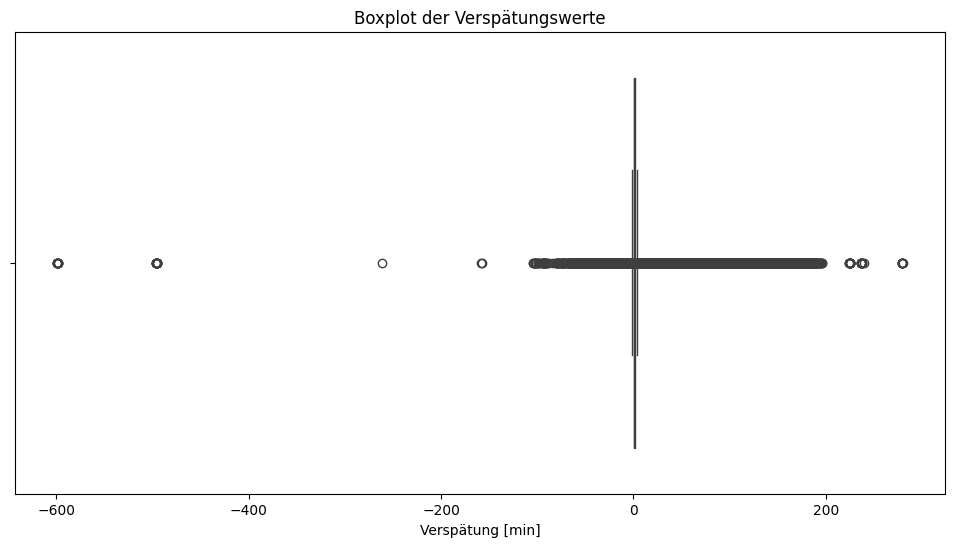

count    3.056213e+07
mean     6.317178e+01
std      1.080158e+02
min     -3.595600e+04
25%      1.600000e+01
50%      4.700000e+01
75%      8.800000e+01
max      1.679400e+04
Name: VERSPAETUNG [s], dtype: float64


In [14]:
# 1. Boxplot der Verspätungswerte
plt.figure(figsize=(12, 6))
sns.boxplot(x = df_verkehr_2024["VERSPAETUNG [s]"] / 60)
plt.xlabel("Verspätung [min]")
plt.title("Boxplot der Verspätungswerte")
plt.show()

# 2. Statistische übersicht der Werte
print(df_verkehr_2024["VERSPAETUNG [s]"].describe())


In [15]:
def plot_verspaetung_hist(df, ymax, xmin=-100, xmax=300, ymin=0, bins=150):
        """
        Die Funktion generiert drei nebeneinanderstehende Histogramme:
        1. Gesamte Verteilung aller Verspätungen.
        2. Vergleich der Verteilungen zwischen realen und geschätzten Prognosewerten.
        3. Darstellung der Verteilung für reale Prognosen (Status "REAL").

        Parameter:
        ----------
        df1 :   pandas.DataFrame

        ymax :  int oder float
                Maximale Ausprägung der y-Achse (Häufigkeit) in allen Subplots.

        xmin :  int oder float, optional (Standard: -100)
                Minimale Ausprägung der x-Achse (Verspätung in Minuten).

        xmax :  int oder float, optional (Standard: 300)
                Maximale Ausprägung der x-Achse (Verspätung in Minuten).

        ymin :  int oder float, optional (Standard: 0)
                Minimale Ausprägung der y-Achse (Häufigkeit).

        bins :  int, optional (Standard: 150)
                Anzahl der Bins (Intervalle) für die Histogramme.

        Rückgabe:
        ---------
        None
                Die Funktion zeigt die Plots direkt an, gibt jedoch keine Werte zurück.
        """
        fig, axs = plt.subplots(1, 3, figsize=(16, 6), sharey=True)

        df_real = df[df["AB_PROGNOSE_STATUS"] == "REAL"]
        df_geschaetzt = df[df["AB_PROGNOSE_STATUS"] == "GESCHAETZT"]

        # Gesamtdaten
        sns.histplot(x=df["VERSPAETUNG [s]"] / 60, bins=bins, ax=axs[0])
        axs[0].set_title("Alle Verspätungen")
        axs[0].set_xlim(xmin, xmax)
        axs[0].set_ylim(ymin, ymax)
        axs[0].set_xlabel("Verspätung [min]")

        # REAL vs. GESCHÄTZT
        sns.histplot(x=df_real["VERSPAETUNG [s]"] / 60, bins=bins,
                        color="blue", label="REAL", ax=axs[1])
        sns.histplot(x=df_geschaetzt["VERSPAETUNG [s]"] / 60, bins=bins,
                        color="orange", label="GESCHÄTZT", ax=axs[1])
        axs[1].set_title("REAL vs. GESCHÄTZT")
        axs[1].set_xlim(xmin, xmax)
        axs[1].legend()
        axs[1].set_xlabel("Verspätung [min]")

        # Nur REAL
        sns.histplot(x=df_real["VERSPAETUNG [s]"] / 60, bins=bins,
                        color="blue", label="REAL", ax=axs[2])
        axs[2].set_title("Nur REAL")
        axs[2].set_xlim(xmin, xmax)
        axs[2].legend()
        axs[2].set_xlabel("Verspätung [min]")



        plt.tight_layout()
        plt.show()

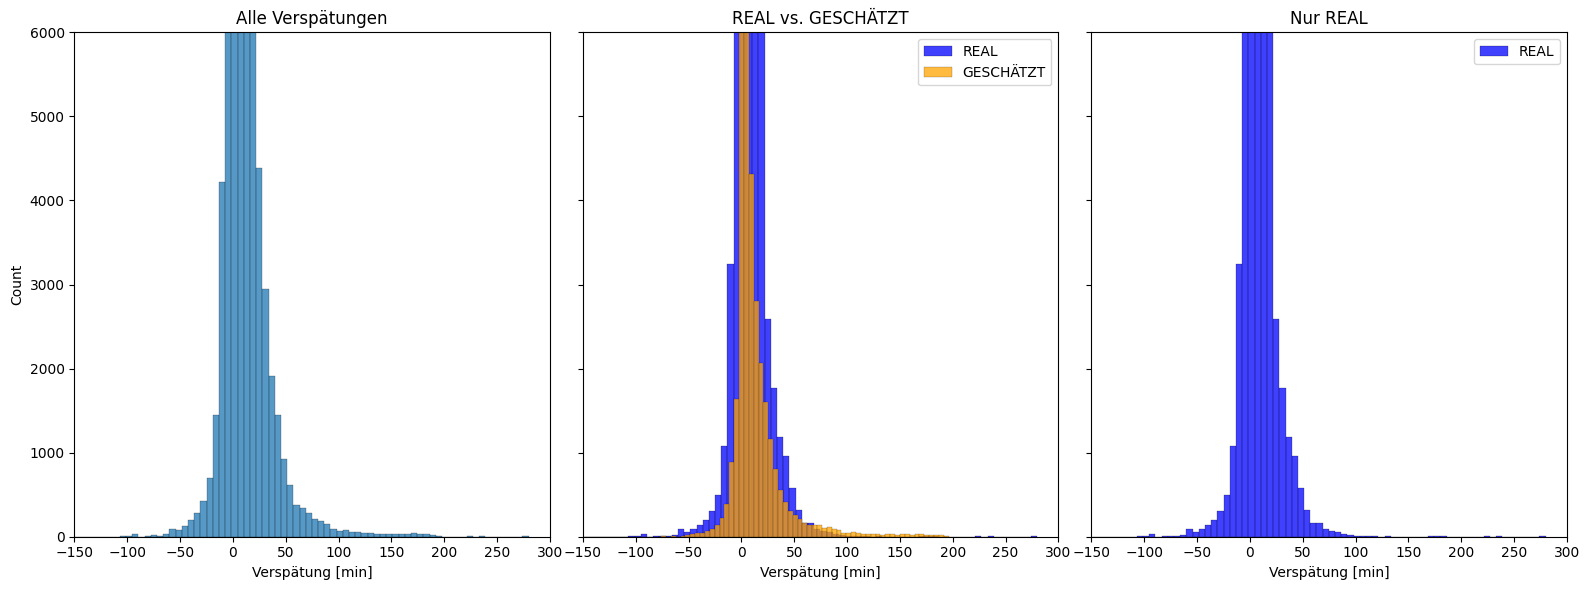

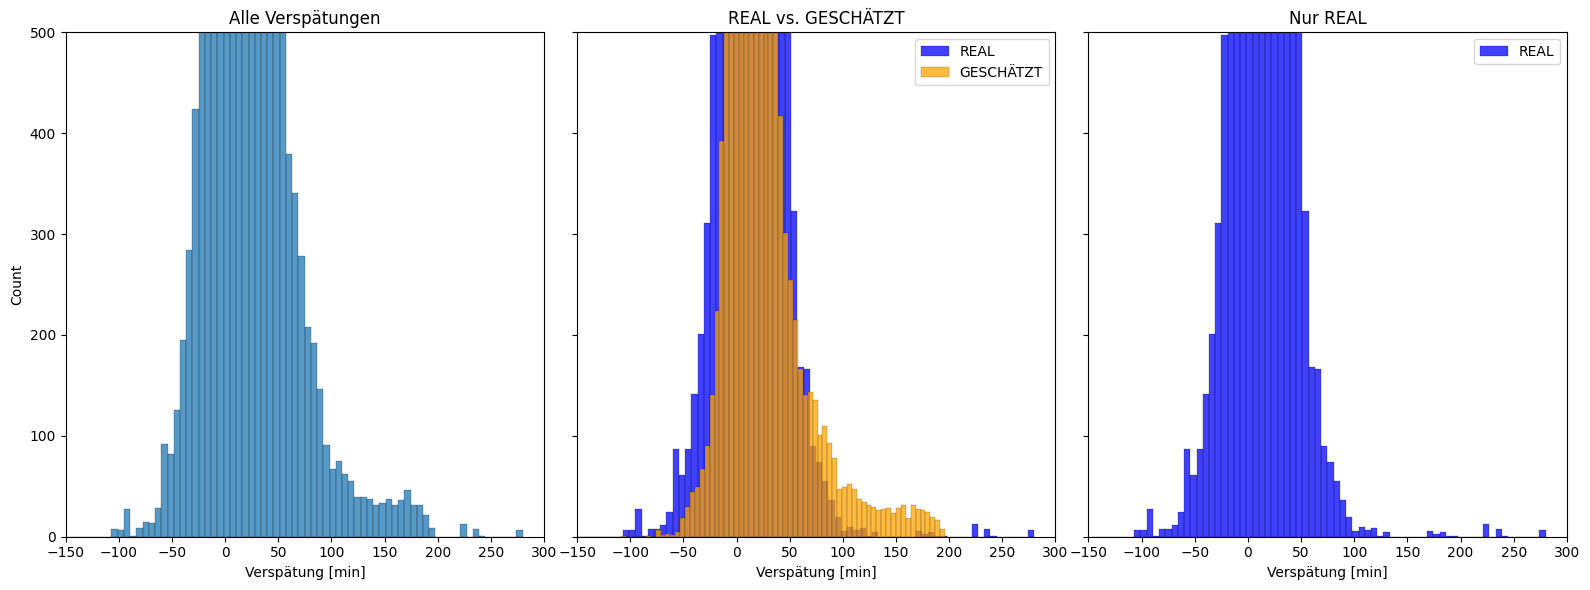

In [16]:
plot_verspaetung_hist(df_verkehr_2024, xmin=-150, ymax=6000)
plot_verspaetung_hist(df_verkehr_2024, xmin=-150, ymax=500)

In [17]:
# 1. Daten zuweisen
data = df_verkehr_2024["VERSPAETUNG [s]"]

# 2. Verspätungen zwischen 1 Min und 30 Min definieren
gruppe_normal = data[(data > 60) & (data <= 1800)]

# 3. Verspätungen zwischen 30 Min und Maximum definieren
gruppe_extrem = data[data > 1800]

# 4. Mengen berechnen
anzahl_gesamt = len(data[data > 0])
anzahl_normal = len(gruppe_normal)
anzahl_extrem = len(gruppe_extrem)

# 5. Verhältnis berechnen
anteil_normal = anzahl_normal / anzahl_gesamt * 100
anteil_extrem = anzahl_extrem / anzahl_gesamt * 100

# 6. Anzeigen der Ergebnisse
print(f"Anzahl Fahrten mit 0–30 Min Verspätung: {anzahl_gesamt}")
print(f"Anzahl Fahrten mit 1–30 Min Verspätung: {anzahl_normal}")
print(f"Anzahl Fahrten mit >30 Min Verspätung: {anzahl_extrem}")
print(f"Anteil 0–30 Min: {anteil_normal:.2f} %")
print(f"Anteil >30 Min: {anteil_extrem:.2f} %")

Anzahl Fahrten mit 0–30 Min Verspätung: 26225460
Anzahl Fahrten mit 1–30 Min Verspätung: 12201490
Anzahl Fahrten mit >30 Min Verspätung: 9002
Anteil 0–30 Min: 46.53 %
Anteil >30 Min: 0.03 %


In [18]:
# 1.Filterbedingungen definieren für die Bereinigung der Verspätungswerte
# filter_positive = df_verkehr_2024["VERSPAETUNG [s]"] > 0 # Nur positive Werte
filter_extrem_werte = df_verkehr_2024["VERSPAETUNG [s]"] <= 1800 # Nur Werte unter 30 Minuten
filter_negative_werte = df_verkehr_2024["VERSPAETUNG [s]"] > 60 # Nur Werte über 1 Minute

# 2.Filter anwenden
df_verkehr_2024_cleaned = df_verkehr_2024[filter_negative_werte & filter_extrem_werte]

# 3.Anzeige der Länge des Dataframes
print(len(df_verkehr_2024_cleaned))

12201490


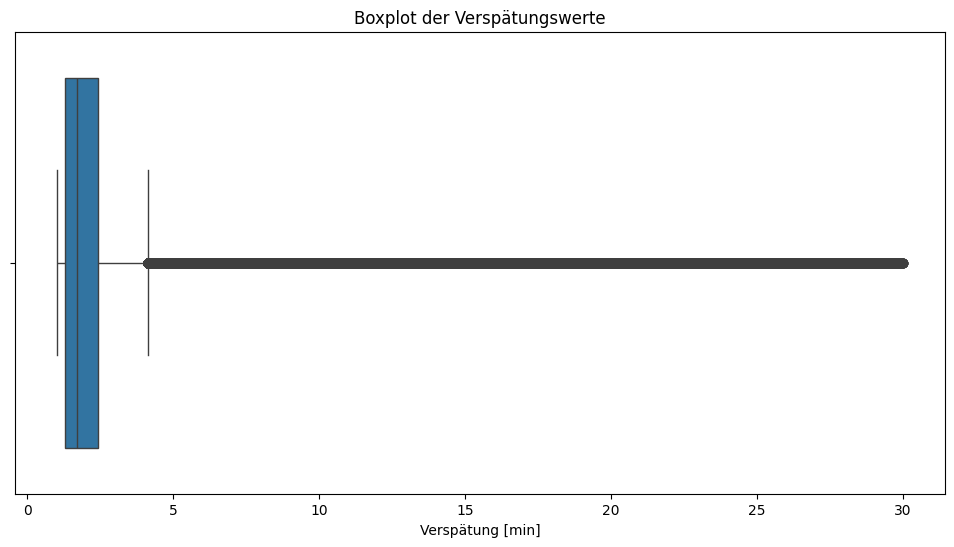

count    1.220149e+07
mean     1.278387e+02
std      8.919884e+01
min      6.100000e+01
25%      7.800000e+01
50%      1.020000e+02
75%      1.460000e+02
max      1.800000e+03
Name: VERSPAETUNG [s], dtype: float64


In [19]:
# 1.Boxplot der bereinigten Verspätungswerte
plt.figure(figsize = (12, 6))
ax = sns.boxplot(x = df_verkehr_2024_cleaned["VERSPAETUNG [s]"]/60)
plt.xlabel("Verspätung [min]")
plt.title("Boxplot der Verspätungswerte")
plt.show()

# 2. Statistische übersicht der Werte
print(df_verkehr_2024_cleaned["VERSPAETUNG [s]"].describe())

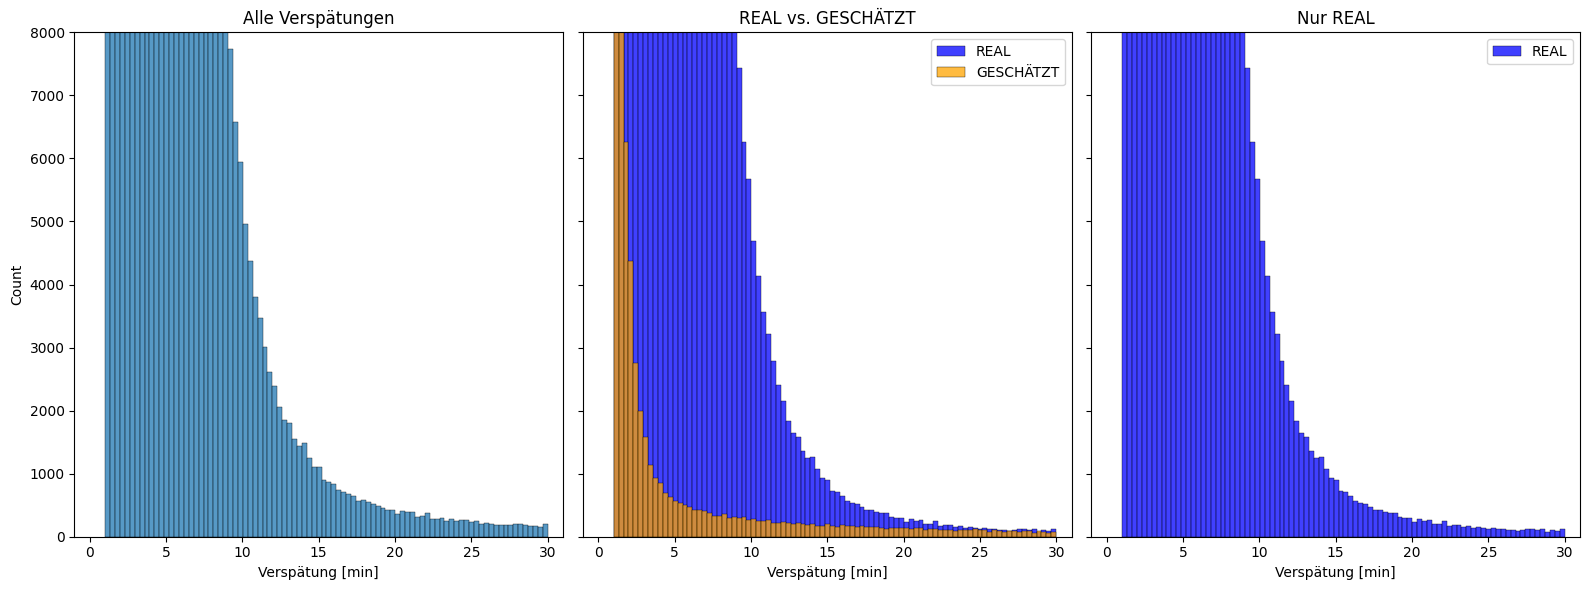

In [20]:
plot_verspaetung_hist(df_verkehr_2024_cleaned, xmin=-1, xmax=31, ymax=8000, bins=90)

Analyse der Daten

In [ ]:
# 1. Kopie der bereinigten Daten
df = df_verkehr_2024_cleaned.copy()

# 2. Kalenderwoche berechnen (als Startdatum)
df['KALENDERWOCHE'] = df['ABFAHRTSZEIT'].dt.to_period("W").dt.start_time.dt.date

# 3. Gruppierung nach Kalenderwoche
gruppe = df.groupby('KALENDERWOCHE')

# 4. Wöchentliche Summen und Mittelwerte berechnen
weekly_sum = gruppe['VERSPAETUNG [s]'].sum()
weekly_avg = gruppe['VERSPAETUNG [s]'].mean()

# 5. Plot mit zwei Y-Achsen
fig, ax1 = plt.subplots(figsize=(16, 6))

# Balken: Wöchentliche Summe (linke Achse)
ax1.bar(weekly_sum.index.astype(str), weekly_sum.values, label='Wöchentliche Summe')
ax1.set_xlabel('Kalenderwoche (Startdatum)')
ax1.set_ylabel('Summe der Verspätung [s]')
ax1.tick_params(axis='y')
ax1.set_xticklabels(weekly_sum.index.astype(str), rotation=90)

# Zweite Y-Achse für den Durchschnitt
ax2 = ax1.twinx()
ax2.plot(weekly_avg.index.astype(str), weekly_avg.values, color='red', linewidth=2, marker='o', label='Ø Verspätung')
ax2.set_ylabel('Ø Verspätung [s]', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Titel und Layout
plt.title('Wöchentliche Verspätung: Summe & Durchschnitt')
fig.tight_layout()
plt.show()


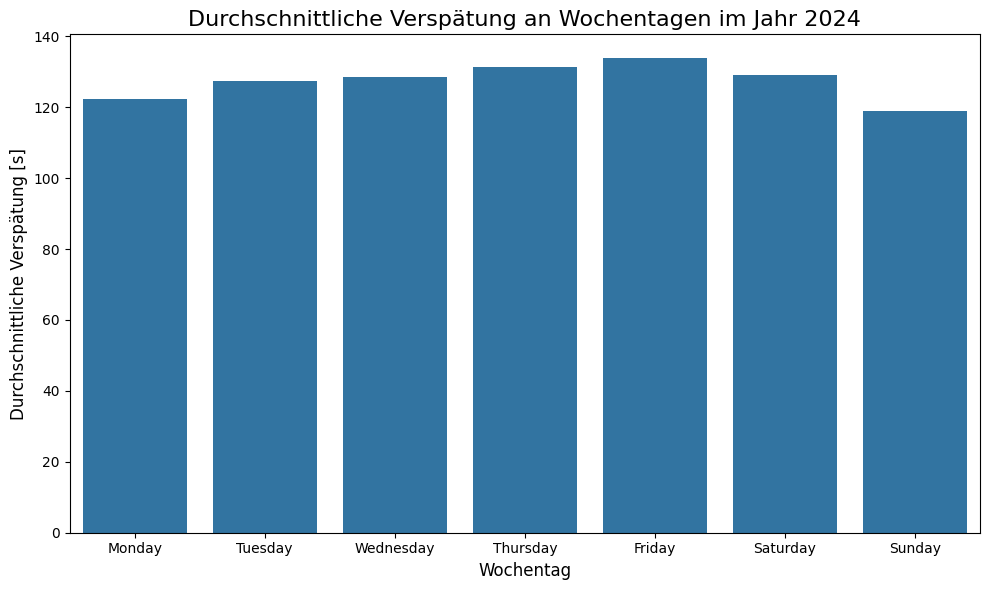

In [ ]:
# 1. Kopie der bereinigten Daten
df = df_verkehr_2024_cleaned.copy()

# Extrahiere den Wochentag als String (Montag, Dienstag, ...)
df['Wochentag'] = df['ABFAHRTSZEIT'].dt.strftime('%A')  # %A gibt den vollständigen Wochentagsnamen zurück

# Gruppiere nach Wochentag und berechne die durchschnittliche Verspätung pro Wochentag
weekday_delays_avg = df.groupby('Wochentag')['VERSPAETUNG [s]'].mean()

# Sortiere die Wochentage gemäß der Reihenfolge von Montag bis Sonntag
wochentage_sort = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_delays_avg = weekday_delays_avg[wochentage_sort]

# Erstelle eine Säulengrafik für die durchschnittliche Verspätung an Wochentagen
plt.figure(figsize=(10,6))
sns.barplot(x=weekday_delays_avg.index, y=weekday_delays_avg.values)

# Achsenbeschriftungen und Titel hinzufügen
plt.title('Durchschnittliche Verspätung an Wochentagen im Jahr 2024', fontsize=16)
plt.xlabel('Wochentag', fontsize=12)
plt.ylabel('Durchschnittliche Verspätung [s]', fontsize=12)

# Zeige die Grafik an
plt.tight_layout()
plt.show()

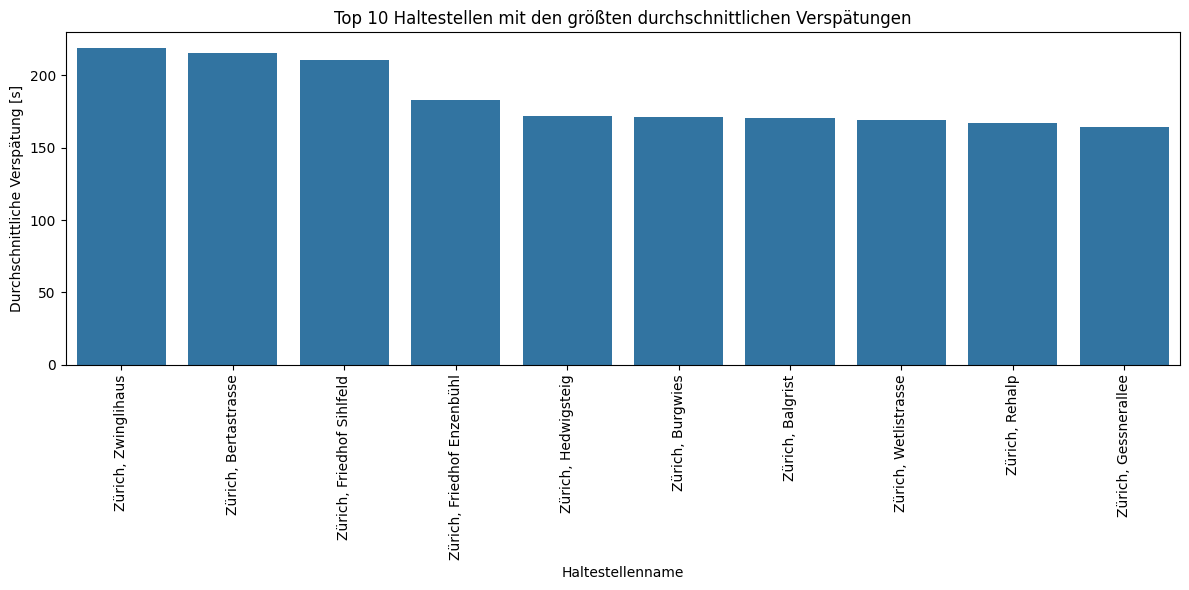

In [ ]:
# 1. Kopie der bereinigten Daten
df = df_verkehr_2024_cleaned.copy()

# Gruppiere nach Haltestellen und berechne die durchschnittliche Verspätung pro Haltestelle
halt_delays_avg = df.groupby('HALTESTELLEN_NAME')['VERSPAETUNG [s]'].mean()

# Zeige nur die 10 Haltestellen mit der größten durchschnittlichen Verspätung
halt_delays_top10 = halt_delays_avg.nlargest(10)

# Erstelle eine Säulengrafik für die 10 Haltestellen mit den größten durchschnittlichen Verspätungen
plt.figure(figsize=(12,6))
sns.barplot(x=halt_delays_top10.index, y=halt_delays_top10.values)

# Achsenbeschriftungen und Titel hinzufügen
plt.title('Top 10 Haltestellen mit den größten durchschnittlichen Verspätungen')
plt.xlabel('Haltestellenname')
plt.ylabel('Durchschnittliche Verspätung [s]')

# Drehe die X-Achsen-Beschriftungen, um sie besser lesbar zu machen
plt.xticks(rotation=90)

# Zeige die Grafik an
plt.tight_layout()
plt.show()

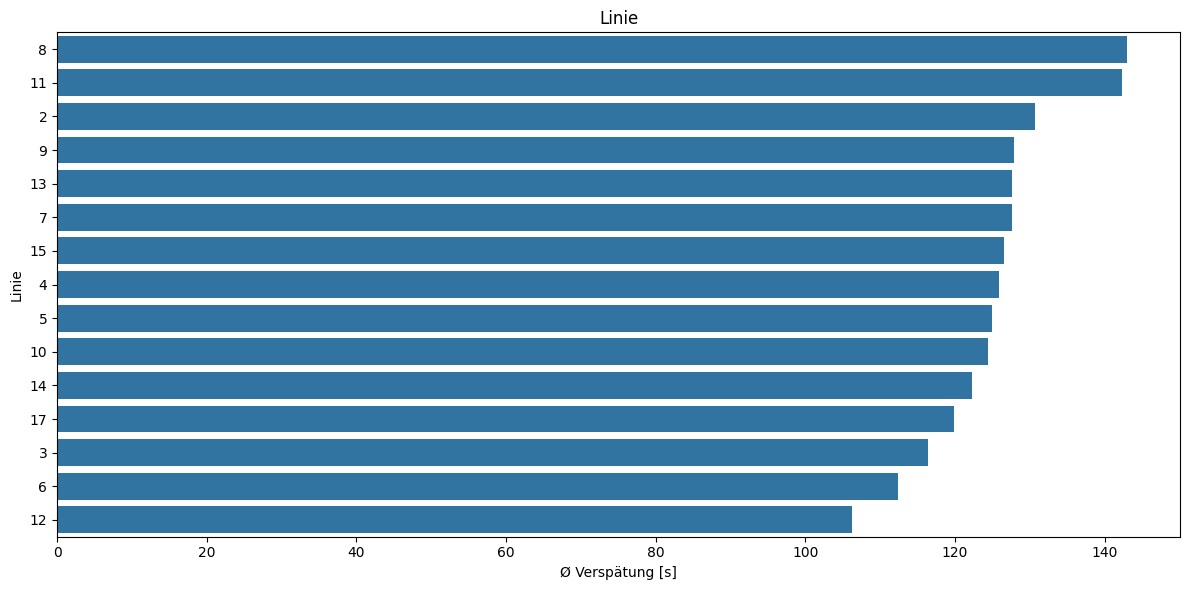

In [ ]:
verspaetungen_mean = df_verkehr_2024_cleaned.groupby("LINIEN_TEXT", as_index=False)["VERSPAETUNG [s]"].mean()

plt.figure(figsize=(12, 6))
sns.barplot(data=verspaetungen_mean, y="LINIEN_TEXT", x="VERSPAETUNG [s]", order=verspaetungen_mean.sort_values("VERSPAETUNG [s]", ascending=False)["LINIEN_TEXT"])
plt.ylabel("Linie")
plt.xlabel("Ø Verspätung [s]")
plt.title("Linie")
plt.tight_layout()
plt.show()

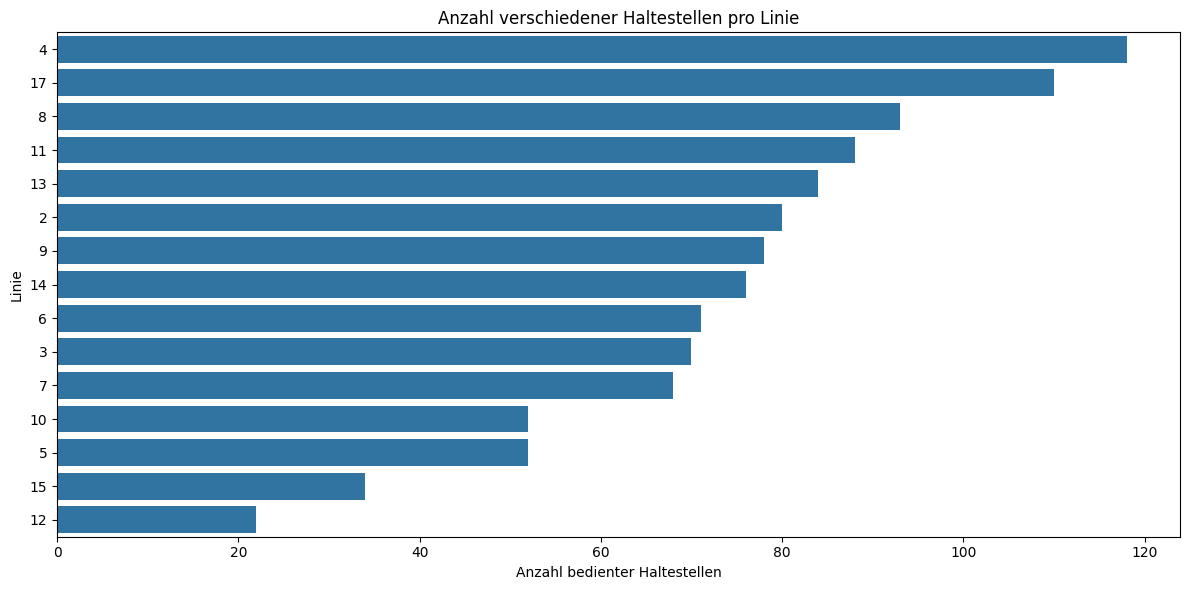

118

In [ ]:
haltestellen_pro_linie = df_verkehr_2024.groupby("LINIEN_TEXT")["HALTESTELLEN_NAME"].nunique().reset_index()
haltestellen_pro_linie = haltestellen_pro_linie.rename(columns={"HALTESTELLEN_NAME": "Anzahl_Haltestellen"})

plt.figure(figsize=(12, 6))
sns.barplot(data=haltestellen_pro_linie.sort_values("Anzahl_Haltestellen", ascending=False),
            y="LINIEN_TEXT", x="Anzahl_Haltestellen")
plt.xlabel("Anzahl bedienter Haltestellen")
plt.ylabel("Linie")
plt.title("Anzahl verschiedener Haltestellen pro Linie")
plt.tight_layout()
plt.show()

df_verkehr_2024[df_verkehr_2024["LINIEN_TEXT"] == "4"]["HALTESTELLEN_NAME"].nunique()

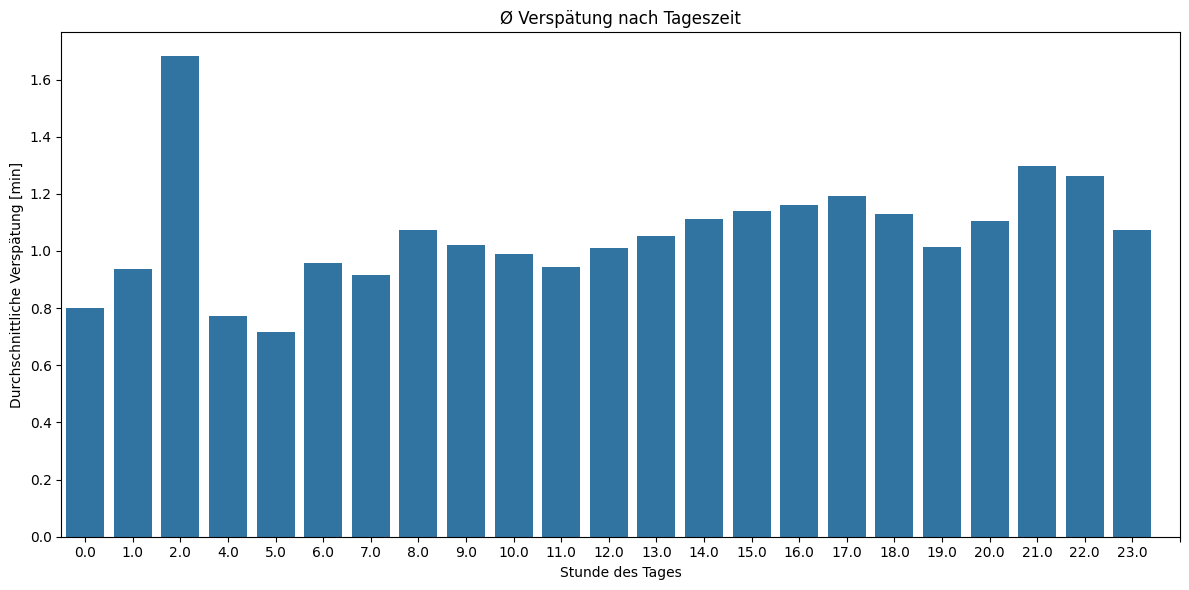

In [ ]:
df_verkehr_2024["STUNDE"] = df_verkehr_2024["ABFAHRTSZEIT"].dt.hour
verspaetung_pro_stunde = df_verkehr_2024.groupby("STUNDE")["VERSPAETUNG [s]"].mean().reset_index()
verspaetung_pro_stunde["VERSPAETUNG [min]"] = verspaetung_pro_stunde["VERSPAETUNG [s]"] / 60

plt.figure(figsize=(12, 6))
sns.barplot(data=verspaetung_pro_stunde, x="STUNDE", y="VERSPAETUNG [min]")
plt.title("Ø Verspätung nach Tageszeit")
plt.xlabel("Stunde des Tages")
plt.ylabel("Durchschnittliche Verspätung [min]")
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

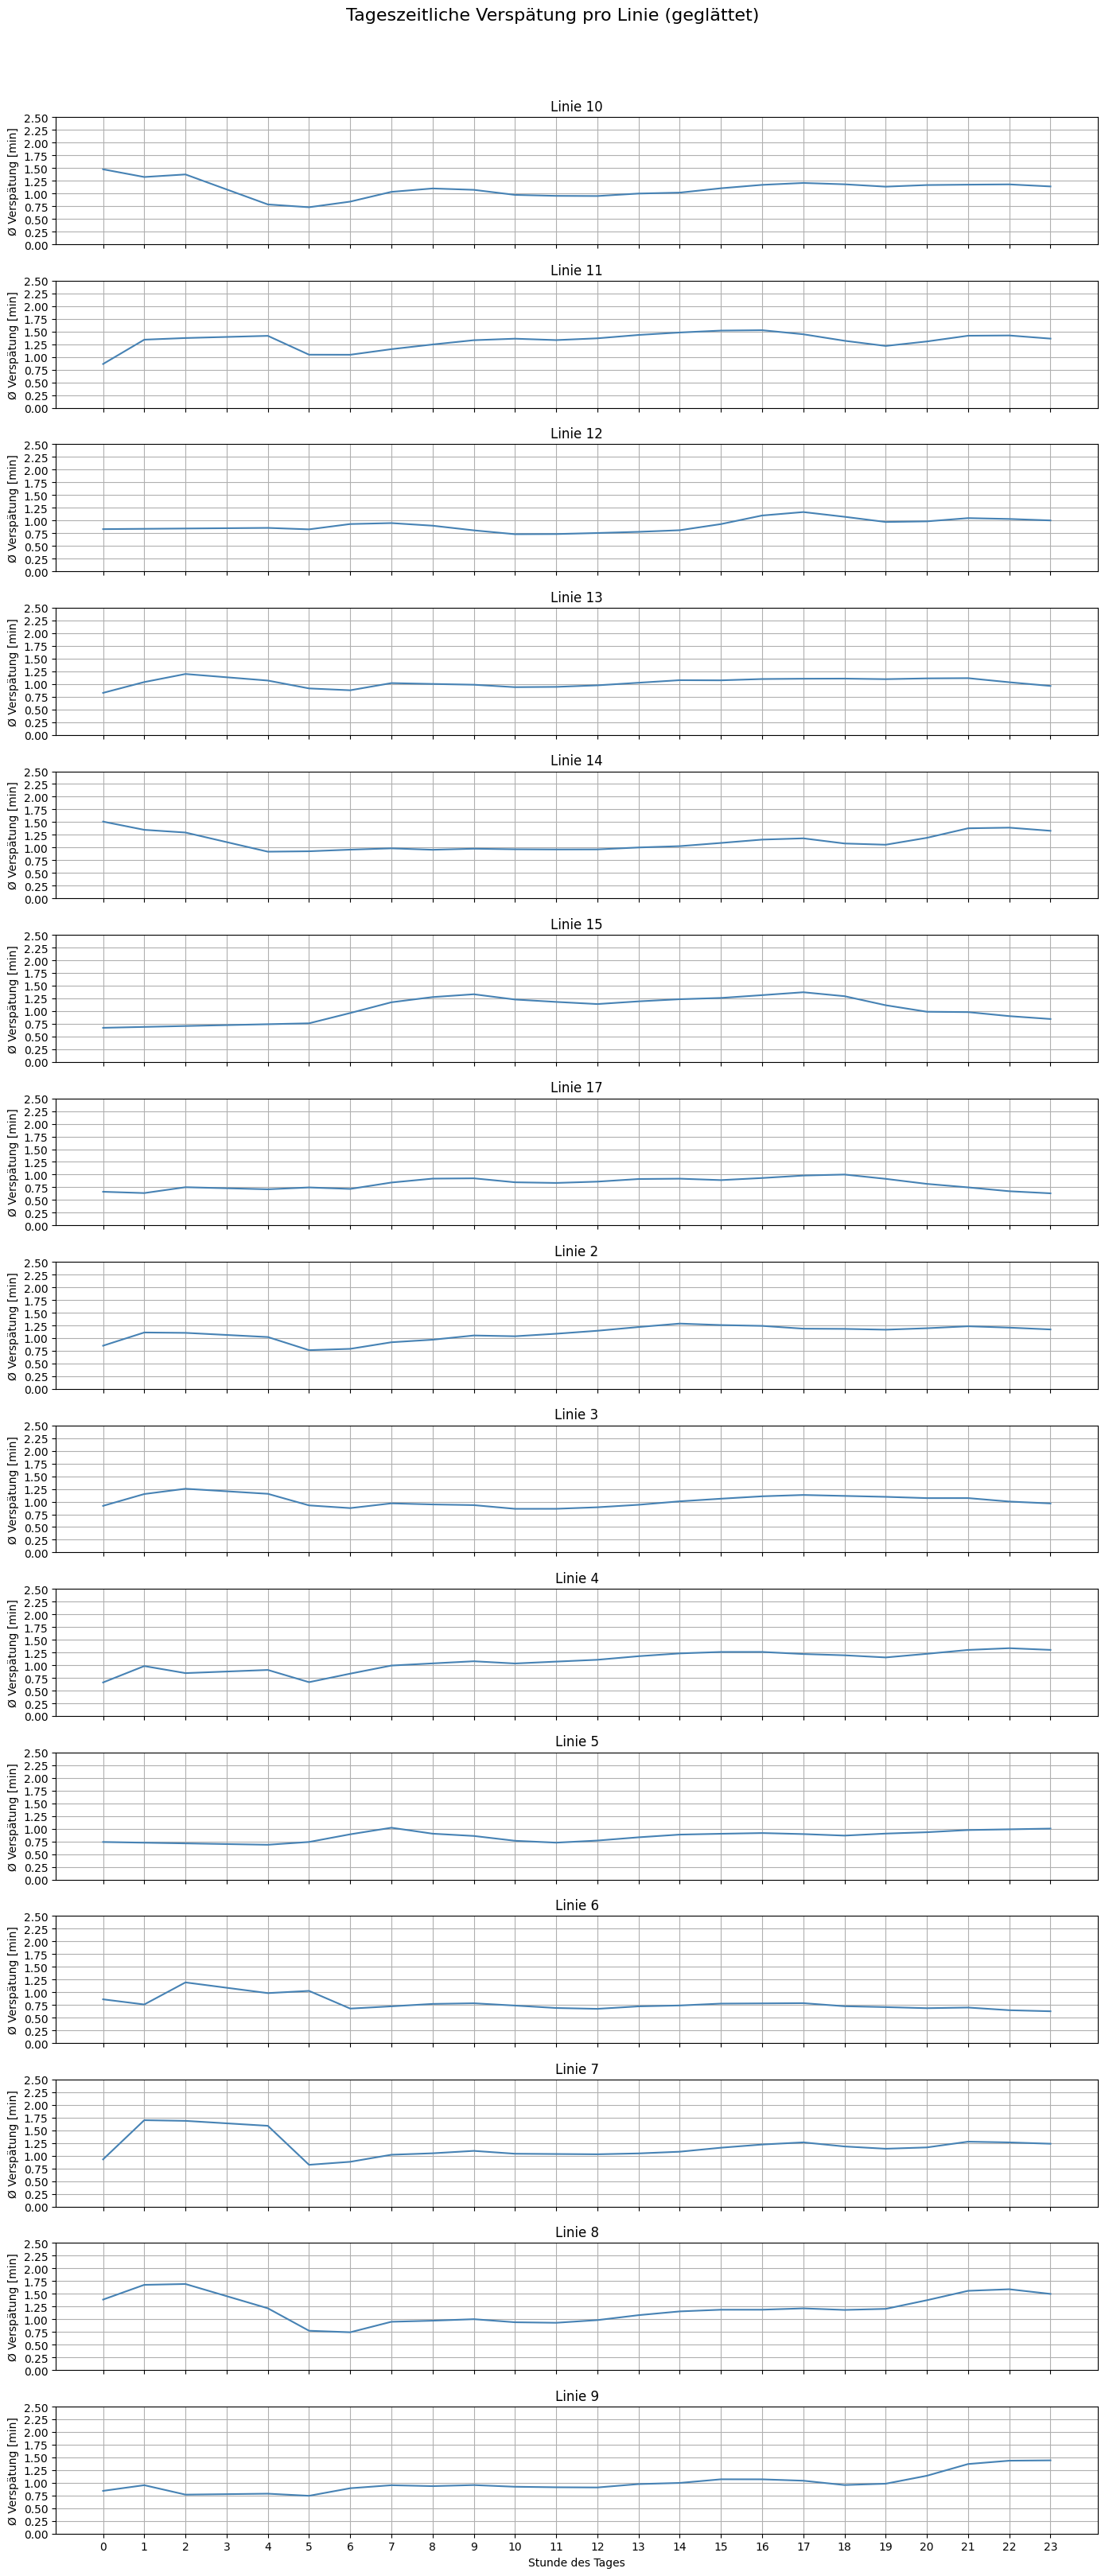

In [ ]:
# 1. Datensatz kopieren
df_linien_plot = df_verkehr_2024.copy()

# 2. Stunde extrahieren
df_linien_plot["STUNDE"] = df_linien_plot["ABFAHRTSZEIT"].dt.hour

# 3. Gruppieren nach Linie und Stunde → mittlere Verspätung in Sekunden
df_grouped = (
    df_linien_plot.groupby(["LINIEN_TEXT", "STUNDE"])["VERSPAETUNG [s]"]
    .mean()
    .reset_index()
)

# 4. Verspätung in Minuten umrechnen
df_grouped["VERSPAETUNG [min]"] = df_grouped["VERSPAETUNG [s]"] / 60

# 5. Gleitender Mittelwert (optional zur Glättung von Spitzen)
df_grouped["VERSPAETUNG_GLATT"] = (
    df_grouped
    .groupby("LINIEN_TEXT")["VERSPAETUNG [min]"]
    .transform(lambda x: x.rolling(window=3, center=True, min_periods=1).mean())
)

# 6. Alle Linien extrahieren
alle_linien = df_grouped["LINIEN_TEXT"].unique()

# 7. Subplots vorbereiten: ein Plot pro Linie untereinander
fig, axes = plt.subplots(
    nrows=len(alle_linien), ncols=1,
    figsize=(14, len(alle_linien)*2.2),
    sharex=True
)

# 8. Zeichnen
for ax, linie in zip(axes, alle_linien):
    df_line = df_grouped[df_grouped["LINIEN_TEXT"] == linie]
    sns.lineplot(data=df_line, x="STUNDE", y="VERSPAETUNG_GLATT", ax=ax, color="steelblue")
    ax.set_title(f"Linie {linie}")
    ax.set_ylabel("Ø Verspätung [min]")
    ax.set_xticks(range(0, 24))
    ax.set_yticks(np.arange(0, 2.75, 0.25))
    ax.grid(True)

# 9. Layout
plt.suptitle("Tageszeitliche Verspätung pro Linie (geglättet)", fontsize=16)
plt.xlabel("Stunde des Tages")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## 3.2 Wetterdaten

### 3.2.1 Import Wetterdatensatz 1
Zunächst wurde auf IDAweb nach einer Wetterstation gesucht, die zentral in der Stadt Zürich liegt und genügend unterschiedliche, relevante und aktuelle Wetterdaten zur Verfügung stellt. Leider ist die Plattform nicht sehr benutzerfreundlich und die Suche erwies sich als sehr aufwändig. Nach erfolgter Suche wurde die Wetterstation Zürich Kaserne (NABZUE) als geeignetste Wetterstation identifiziert. Wir haben die folgenden fünf Wetterparameter (Granularität=stündlich) für den Zeitraum vom 1.1.2022 bis zum 31.12.2024 heruntergeladen:

-Böenspitze (Sekundenböe); Stundenmaximum in km/h

-Globalstrahlung; Stundenmittel in W/m²

-Lufttemperatur; 2 m über Boden; Stundenmittel in °C

-Niederschlag; Stundensumme in mm

-Windgeschwindigkeit skalar; Stundenmittel in km/h

Die Legende zum Wetterdatensatz kann in folgender Datei eingesehen werden: Legende_Wetterdatensatz1.txt

In [ ]:
# 1. Wetterdatensatz 1 einlesen (Böenspitze_kmh, Globalstrahlung_Wm2, Temperatur_C, Niederschlag_mm, Windgeschwindigkeit_kmh)
url = "https://raw.githubusercontent.com/RFankhauser/MSc_WI_BINA/refs/heads/main/Semesterarbeit/Wetterdaten/Wetterdatensatz1.csv"
df_wetter1= pd.read_csv(url,
                        sep=";",
                        encoding="utf-8")

# 2. Spaltennamen umbenennen (gemäss der Legende)
parameter_mapping1 = {
    "fu3010h1": "BOEENSPITZE [kmh]",
    "gre000h0": "GLOBALSTRAHLUNG [Wm2]",
    "tre200h0": "TEMPERATUR [°C]",
    "rre150h0": "NIEDERSCHLAG [mm]",
    "fu3010h0": "WINDGESCHWINDIGKEIT [kmh]"
}

df_wetter1 = df_wetter1.rename(columns=parameter_mapping1)
df_wetter1 = df_wetter1.rename(columns={"stn": "WETTERSTATION", "time": "TIME"})

# 3. 'TIME' in Datetime umwandeln
df_wetter1['TIME'] = pd.to_datetime(df_wetter1['TIME'], format='%Y%m%d%H', errors='coerce')

# 4. Filtern nach dem Jahr 2024
df_wetter1 = df_wetter1[df_wetter1['TIME'].dt.year == 2024]

# 5. Überprüfung der Spalteninhalte nach dem Filtern
anzahl_2024 = len(df_wetter1)
print(f"Anzahl der Einträge für 2024: {anzahl_2024}")

# 6. Anzeigen der ersten 10 Zeilen
display(df_wetter1.head(10))

Anzahl der Einträge für 2024: 8784


,WETTERSTATION,TIME,BOEENSPITZE [kmh],GLOBALSTRAHLUNG [Wm2],TEMPERATUR [°C],NIEDERSCHLAG [mm],WINDGESCHWINDIGKEIT [kmh]
17520,NABZUE,2024-01-01 00:00:00,40.7,3,5.1,0.0,10.4
17521,NABZUE,2024-01-01 01:00:00,24.8,-1,5.1,0.0,7.9
17522,NABZUE,2024-01-01 02:00:00,32.0,-1,5.2,0.0,9.4
17523,NABZUE,2024-01-01 03:00:00,21.2,0,5.3,0.1,9.4
17524,NABZUE,2024-01-01 04:00:00,50.4,0,4.9,1.1,15.5
17525,NABZUE,2024-01-01 05:00:00,33.5,0,5.3,0.0,12.6
17526,NABZUE,2024-01-01 06:00:00,33.8,0,5.6,0.0,10.4
17527,NABZUE,2024-01-01 07:00:00,36.7,0,6.0,0.0,11.9
17528,NABZUE,2024-01-01 08:00:00,35.3,12,6.3,0.0,11.9
17529,NABZUE,2024-01-01 09:00:00,31.3,51,6.7,0.0,10.1


### 3.2.2 Import Wetterdatensatz 2
Im Wetterdatensatz 1 (Station Zürich Kaserne) sind leider keine Wetterdaten für Schnee, Hagel und Nebel vorhanden. Deshalb wurde nach einer anderen Wetterstation in Zürich gesucht, die diese Daten erfasst. Nach der Suche wurde die Wetterstation Zürich Kloten (KLO) als geeignetste Wetterstation identifiziert. Wir haben die folgenden vier Wetterparameter (Granularität=täglich) für den Zeitraum vom 1.1.2024 bis zum 31.12.2024 heruntergeladen:

-Neuschneehöhe; Tagessumme 6 UTC - 6 UTC Folgetag in cm

-Schneehöhe; Morgenmessung von 6 UTC in cm

-Tag mit Hagel; y/n

-Tag mit Nebel; y/n

Die Legende zum Wetterdatensatz kann in folgender Datei eingesehen werden: Legende_Wetterdatensatz2.txt


In [ ]:
# 1. Wetterdatensatz 2 einlesen (Neuschneehöhe_cm,Schneehöhe_Morgenmessung_6_UTC_cm,Tag_mit_Hagel,Tag_mit_Nebel)
url2 = "https://raw.githubusercontent.com/RFankhauser/MSc_WI_BINA/refs/heads/main/Semesterarbeit/Wetterdaten/Wetterdatensatz2.csv"
df_wetter2 = pd.read_csv(url2,
                         sep=";",
                         encoding="utf-8")

# 2. Spaltennamen anpassen (gemäss der Legende)
parameter_mapping2 = {
    "hns000d0": "NEUSCHNEEHOEHE [cm]",
    "hto000d0": "SCHNEEHOEHE_MORGENMESSUNG_6_UTC [cm]",
    "w3p002d0": "TAG_MIT_HAGEL",
    "w5p002d0": "TAG_MIT_NEBEL"
}

df_wetter2 = df_wetter2.rename(columns=parameter_mapping2)
df_wetter2 = df_wetter2.rename(columns={"stn": "WETTERSTATION_2", "time": "TIME_2"})

# 3. 'TIME_2' in Datetime umwandeln
df_wetter2['TIME_2'] = pd.to_datetime(df_wetter2['TIME_2'], format='%Y%m%d', errors='coerce')

# 4. Anzeigen der ersten 10 Zeilen
display(df_wetter2.head(10))

,WETTERSTATION_2,TIME_2,NEUSCHNEEHOEHE [cm],SCHNEEHOEHE_MORGENMESSUNG_6_UTC [cm],TAG_MIT_HAGEL,TAG_MIT_NEBEL
0,KLO,2024-01-01,0,0,0,0
1,KLO,2024-01-02,0,0,0,0
2,KLO,2024-01-03,0,0,0,0
3,KLO,2024-01-04,0,0,0,0
4,KLO,2024-01-05,0,0,0,0
5,KLO,2024-01-06,0,0,0,0
6,KLO,2024-01-07,0,0,0,0
7,KLO,2024-01-08,0,0,0,0
8,KLO,2024-01-09,2,0,0,0
9,KLO,2024-01-10,0,2,0,0


### 3.2.3 Zusammenführen der beiden Wetterdatensätze

Der Wetterdatensatz 2 hat nur eine tägliche Granularität, daher müssen die Tageswerte auf 24 Stunden multipliziert werden. Ansonsten kann das Zusammenführen der Datensätze aufgrund der unterschiedlichen Tabellenformate nicht funktionieren. Anschlissend werden die beiden Datensätze zusammengeführt.

In [ ]:
# 1. Wiederhole die täglichen Werte von df_wetter2 für jede Stunde des Tages
df_wetter2_repeated = df_wetter2.loc[df_wetter2.index.repeat(24)].reset_index(drop=True)

# 2. Kombiniere die beiden DataFrames
df_wetter = pd.concat([df_wetter1.reset_index(drop=True), df_wetter2_repeated], axis=1)

# 3. Entferne die Spalten 'WETTERSTATION_2' und 'TIME_2' aus dem kombinierten DataFrame
df_wetter = df_wetter.drop(columns=['WETTERSTATION_2', 'TIME_2'])

# 4. Anzeigen der ersten 10 Zeilen
display(df_wetter.head(10))

,WETTERSTATION,TIME,BOEENSPITZE [kmh],GLOBALSTRAHLUNG [Wm2],TEMPERATUR [°C],NIEDERSCHLAG [mm],WINDGESCHWINDIGKEIT [kmh],NEUSCHNEEHOEHE [cm],SCHNEEHOEHE_MORGENMESSUNG_6_UTC [cm],TAG_MIT_HAGEL,TAG_MIT_NEBEL
0,NABZUE,2024-01-01 00:00:00,40.7,3,5.1,0.0,10.4,0,0,0,0
1,NABZUE,2024-01-01 01:00:00,24.8,-1,5.1,0.0,7.9,0,0,0,0
2,NABZUE,2024-01-01 02:00:00,32.0,-1,5.2,0.0,9.4,0,0,0,0
3,NABZUE,2024-01-01 03:00:00,21.2,0,5.3,0.1,9.4,0,0,0,0
4,NABZUE,2024-01-01 04:00:00,50.4,0,4.9,1.1,15.5,0,0,0,0
5,NABZUE,2024-01-01 05:00:00,33.5,0,5.3,0.0,12.6,0,0,0,0
6,NABZUE,2024-01-01 06:00:00,33.8,0,5.6,0.0,10.4,0,0,0,0
7,NABZUE,2024-01-01 07:00:00,36.7,0,6.0,0.0,11.9,0,0,0,0
8,NABZUE,2024-01-01 08:00:00,35.3,12,6.3,0.0,11.9,0,0,0,0
9,NABZUE,2024-01-01 09:00:00,31.3,51,6.7,0.0,10.1,0,0,0,0


### 3.2.4 Datenbereinigung & Formatierung

Die relevanten Spalten werden in numerische Werte (Float) umgewandelt. Ungültige Werte (-) werden als NaN markiert und anschliessend mit dem Durchschnitt der jeweiligen Spalte ersetzt. Abschliessend werden die Anzahl verbleibender NaN-Werte ausgegeben, um sicherzustellen, dass keine Datenlücken mehr vorhanden sind.


In [ ]:
# 1. Umwandlung der angegebenen Spalten in float
columns_to_convert = ["BOEENSPITZE [kmh]", "GLOBALSTRAHLUNG [Wm2]", "TEMPERATUR [°C]",  "NIEDERSCHLAG [mm]",
                      "WINDGESCHWINDIGKEIT [kmh]", "NEUSCHNEEHOEHE [cm]",
                     "SCHNEEHOEHE_MORGENMESSUNG_6_UTC [cm]"]

# 2. Ersetzen von "-" durch NaN in den relevanten Spalten
df_wetter[columns_to_convert] = df_wetter[columns_to_convert].replace("-", np.nan)

# 3. Konvertierung der Spalten in float
df_wetter[columns_to_convert] = df_wetter[columns_to_convert].astype(float)

# 4. Überprüfung der Datentypen nach der Umwandlung
print(df_wetter.dtypes)

# 5. Durchschnitt für jede Spalte berechnen und fehlende Werte durch den jeweiligen Durchschnitt ersetzen
df_wetter.fillna(df_wetter.mean(numeric_only=True), inplace=True)

# 6. Anzahl der NaN-Werte pro Spalte anzeigen
nan_summary = df_wetter.isna().sum()

# 7. Anzahl der NaN-Werte pro Spalte ausgeben
print("\n--- Anzahl der NaN-Werte pro Spalte: --------")
print(nan_summary)

WETTERSTATION                                   object
TIME                                    datetime64[ns]
BOEENSPITZE [kmh]                              float64
GLOBALSTRAHLUNG [Wm2]                          float64
TEMPERATUR [°C]                                float64
NIEDERSCHLAG [mm]                              float64
WINDGESCHWINDIGKEIT [kmh]                      float64
NEUSCHNEEHOEHE [cm]                            float64
SCHNEEHOEHE_MORGENMESSUNG_6_UTC [cm]           float64
TAG_MIT_HAGEL                                    int64
TAG_MIT_NEBEL                                    int64
dtype: object

--- Anzahl der NaN-Werte pro Spalte: --------
WETTERSTATION                           0
TIME                                    0
BOEENSPITZE [kmh]                       0
GLOBALSTRAHLUNG [Wm2]                   0
TEMPERATUR [°C]                         0
NIEDERSCHLAG [mm]                       0
WINDGESCHWINDIGKEIT [kmh]               0
NEUSCHNEEHOEHE [cm]                     

### 3.2.5 Überprüfung der Wetterdaten

Zur besseren Lesbarkeit und Interpretation wurden die Wetterdaten mithilfe eines gleitenden Durchschnitts über 24 Stunden geglättet. Für jede Wettervariable (z. B. Temperatur, Windgeschwindigkeit, Niederschlag) wurde ein eigener Plot erstellt, um den zeitlichen Verlauf über das Jahr hinweg übersichtlich darzustellen.

Die Visualisierung dient gleichzeitig der **Plausibilitätsprüfung** der Wetterdaten. Es zeigen sich erwartbare saisonale Muster:

- **Temperatur**: Anstieg im Frühjahr, Höchstwerte im Sommer, Rückgang im Herbst und Tiefstwerte im Winter.
- **Globalstrahlung**: Hohes Niveau während der Sommermonate, niedriges im Winter.
- **Wind, Böen, Niederschlag**: Schwankungen über das Jahr hinweg mit möglichen Extremwerten in Übergangszeiten.
- **Neuschneehöhe und Schneehöhe**: Auftreten nur im Winterhalbjahr, sonst keine Werte – wie zu erwarten.

Diese Muster bestätigen, dass die Daten **sinnvolle und konsistente Werte** aufweisen. Unplausible Werte oder offensichtliche Datenfehler sind anhand der Plots nicht erkennbar, was auf eine **gute Datenqualität** hindeutet.

Ergänzend zur Zeitreihendarstellung wurde jede Wettervariable auch in Form einer **Kalender-Heatmap** visualisiert. Diese Darstellungsform zeigt für jeden Tag im Jahr den entsprechenden **Tagesdurchschnittswert** und eignet sich besonders gut, um **saisonale Trends, Extremwerte** oder auch **Auffälligkeiten einzelner Tage** auf einen Blick zu erkennen.

Die kompakten Kalenderplots stellen eine intuitive Ergänzung zur gleitenden Mittelwertanalyse dar und bestätigen die zuvor beobachteten Muster nochmals in einer anderen, sehr zugänglichen Form. Besonders hilfreich sind sie auch zur visuellen Identifikation von **länger anhaltenden Wetterphasen** (z. B. Hitzeperioden oder Regenzeiten).

Anschliessend wird mit df_wetter.describe() automatisch die wichtigsten statistischen Kennzahlen für alle numerischen Spalten im Wetter-Datensatz berechnet.

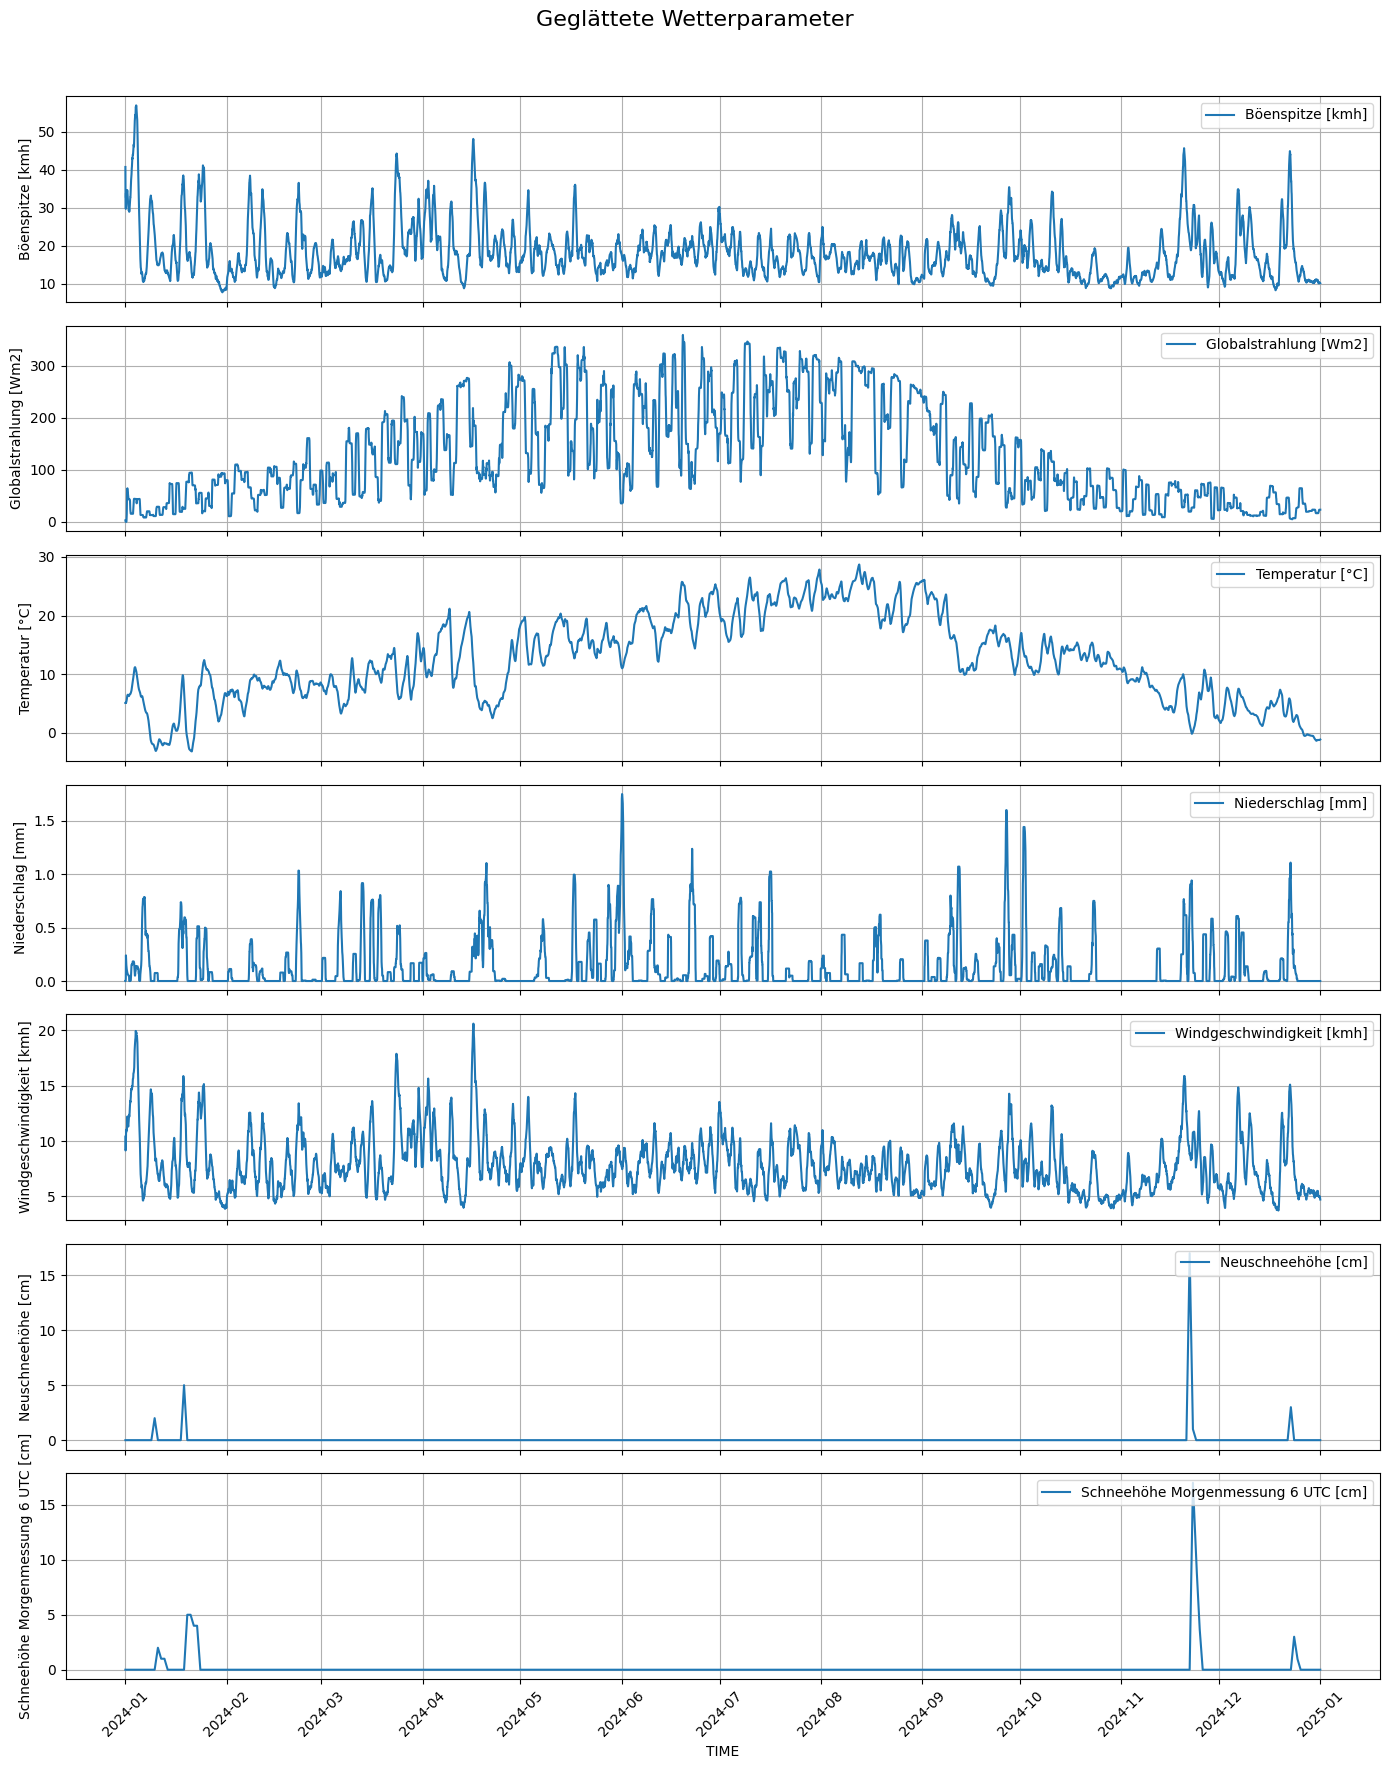

In [ ]:
# 1. Wetterdaten kopieren, damit das Original unverändert bleibt
df_wetter_plot = df_wetter.copy()

# 2. Gleitender Mittelwert über 24 Stunden berechnen (für jede Wettervariable) → Ziel: kurzfristige Schwankungen glätten
df_wetter_plot["BOEENSPITZE_GLATT"] = df_wetter_plot["BOEENSPITZE [kmh]"].rolling(window=24, min_periods=1).mean()
df_wetter_plot["GLOBALSTRAHLUNG_GLATT"] = df_wetter_plot["GLOBALSTRAHLUNG [Wm2]"].rolling(window=24, min_periods=1).mean()
df_wetter_plot["TEMPERATUR_GLATT"] = df_wetter_plot["TEMPERATUR [°C]"].rolling(window=24, min_periods=1).mean()  # 7 Tage
df_wetter_plot["NIEDERSCHLAG_GLATT"] = df_wetter_plot["NIEDERSCHLAG [mm]"].rolling(window=24, min_periods=1).mean()
df_wetter_plot["WIND_GLATT"] = df_wetter_plot["WINDGESCHWINDIGKEIT [kmh]"].rolling(window=24, min_periods=1).mean()
df_wetter_plot["NEUSCHNEE_GLATT"] = df_wetter_plot["NEUSCHNEEHOEHE [cm]"].rolling(window=24, min_periods=1).mean()
df_wetter_plot["SCHNEEHOEHE_GLATT"] = df_wetter_plot["SCHNEEHOEHE_MORGENMESSUNG_6_UTC [cm]"].rolling(window=24, min_periods=1).mean()

# 3. Spaltennamen + passende Achsenbeschriftungen definieren
plot_info = {
    "BOEENSPITZE_GLATT": "Böenspitze [kmh]",
    "GLOBALSTRAHLUNG_GLATT": "Globalstrahlung [Wm2]",
    "TEMPERATUR_GLATT": "Temperatur [°C]",
    "NIEDERSCHLAG_GLATT": "Niederschlag [mm]",
    "WIND_GLATT": "Windgeschwindigkeit [kmh]",
    "NEUSCHNEE_GLATT": "Neuschneehöhe [cm]",
    "SCHNEEHOEHE_GLATT": "Schneehöhe Morgenmessung 6 UTC [cm]"
}

# 4. Subplots (ein Diagramm pro Wettervariable) erzeugen
fig, axes = plt.subplots(nrows=len(plot_info), ncols=1, figsize=(14, 18), sharex=True)

# 5. Jede geglättete Variable einzeln plotten
for ax, (col, label) in zip(axes, plot_info.items()):
    sns.lineplot(x="TIME", y=col, data=df_wetter_plot, ax=ax, label=label)
    ax.set_ylabel(label)
    ax.legend(loc="upper right")
    ax.grid(True)
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))


# 6. Gesamttitel, Layout und Achsenbeschriftung setzen
plt.suptitle("Geglättete Wetterparameter", fontsize=16)
# plt.xlabel("Datum")
plt.xticks(rotation=45)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

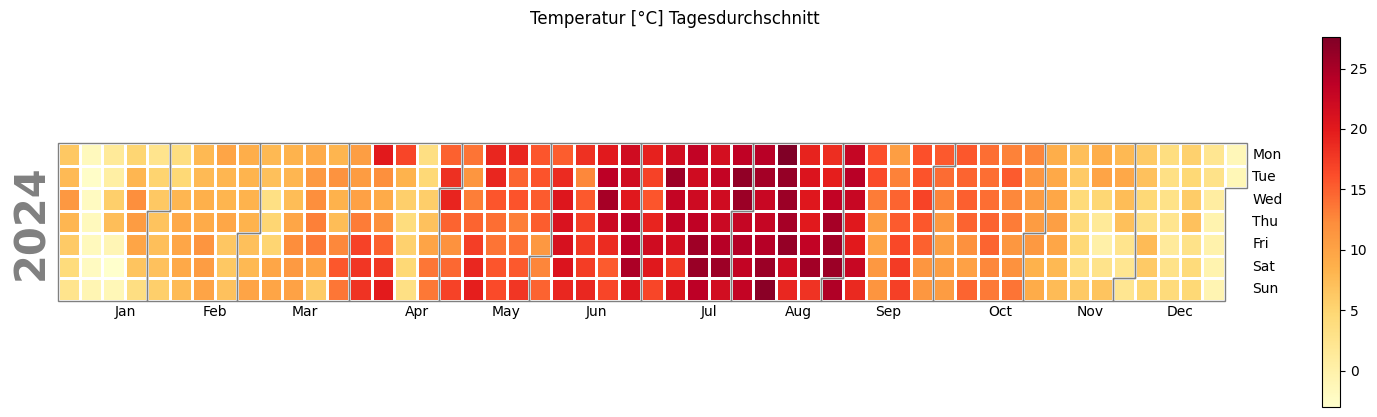

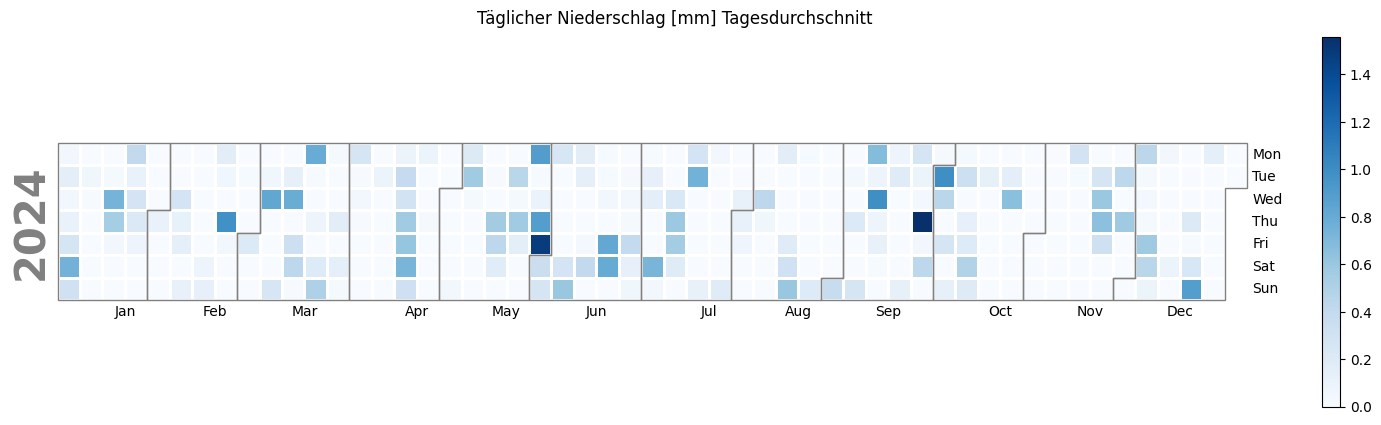

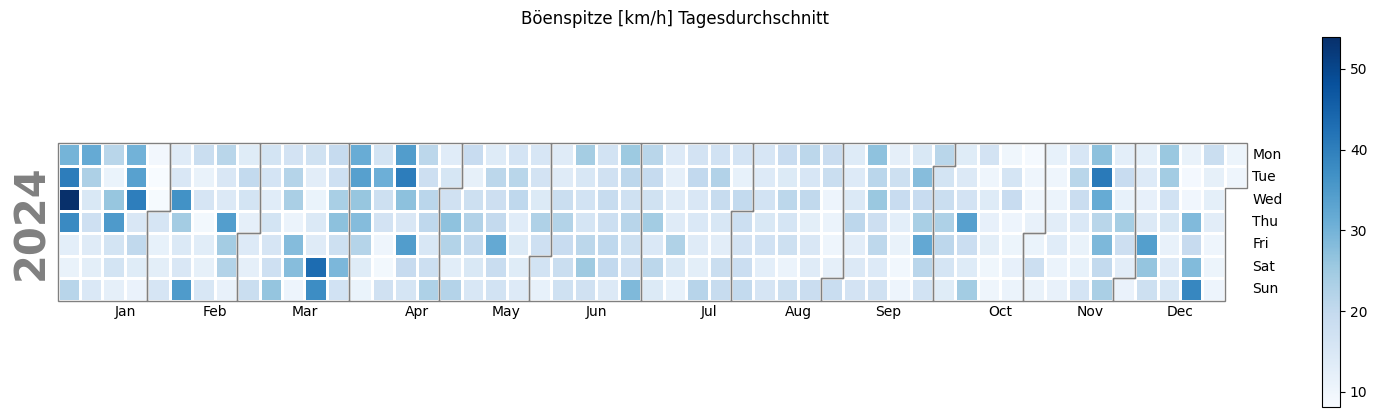

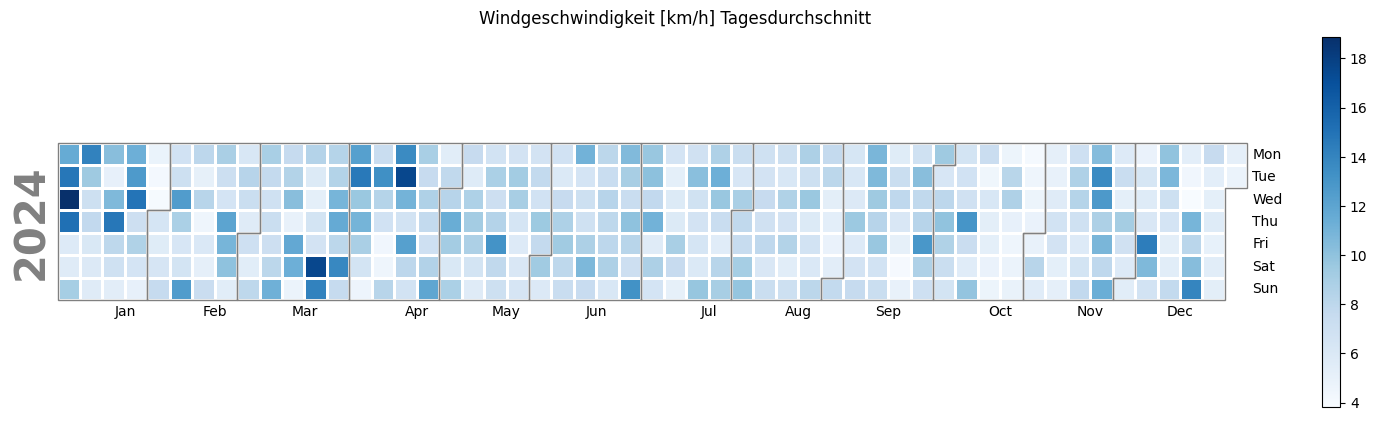

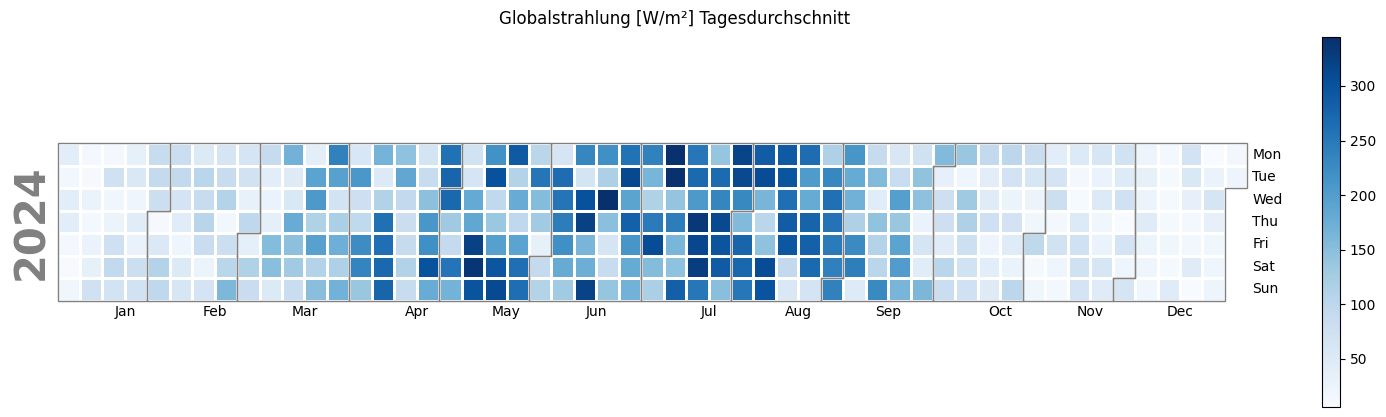

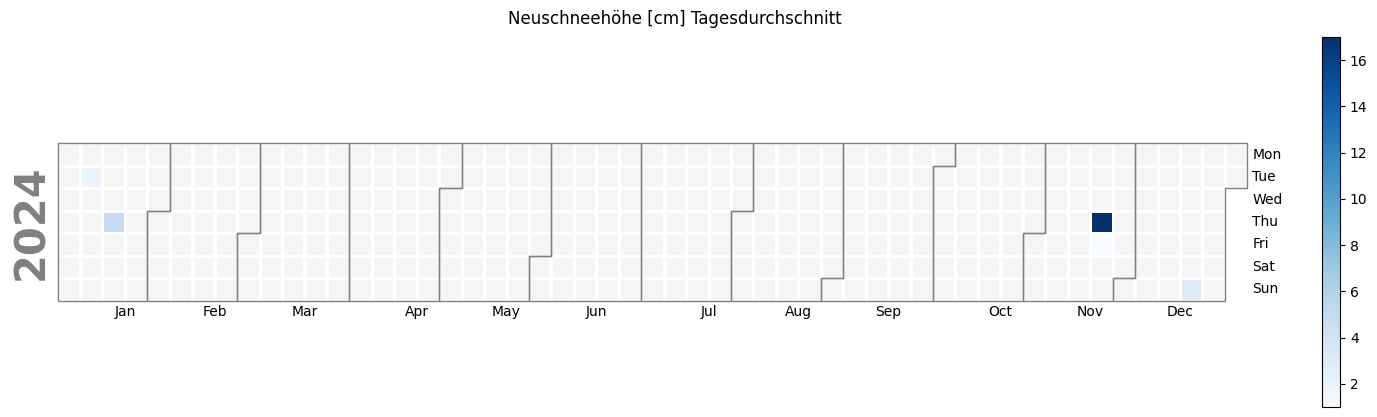

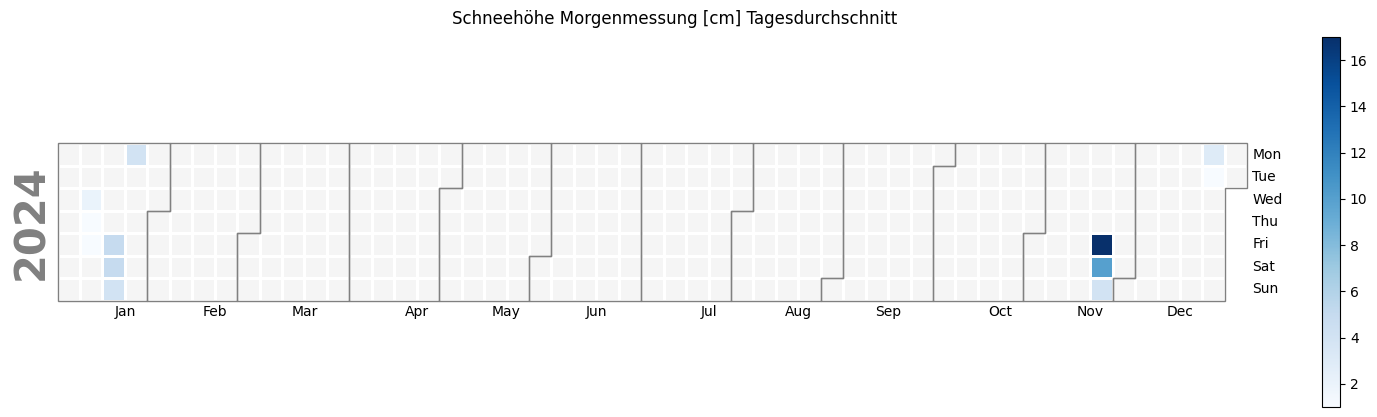

In [ ]:
# 1. Sicherstellen, dass Datum korrekt ist
df_wetter_plot["DATE"] = pd.to_datetime(df_wetter_plot["TIME"])

# 2. Liste der Spalten, die geplottet werden sollen
parameter_liste = {
    "TEMPERATUR [°C]": "Temperatur [°C] Tagesdurchschnitt",
    "NIEDERSCHLAG [mm]": "Täglicher Niederschlag [mm] Tagesdurchschnitt",
    "BOEENSPITZE [kmh]": "Böenspitze [km/h] Tagesdurchschnitt",
    "WINDGESCHWINDIGKEIT [kmh]": "Windgeschwindigkeit [km/h] Tagesdurchschnitt",
    "GLOBALSTRAHLUNG [Wm2]": "Globalstrahlung [W/m²] Tagesdurchschnitt",
    "NEUSCHNEEHOEHE [cm]": "Neuschneehöhe [cm] Tagesdurchschnitt",
    "SCHNEEHOEHE_MORGENMESSUNG_6_UTC [cm]": "Schneehöhe Morgenmessung [cm] Tagesdurchschnitt"
}

# 3. Für jeden Parameter eine Kalender-Heatmap mit Tagesdurchschnitt erzeugen
for spalte, titel in parameter_liste.items():
    # Tagesdurchschnitt berechnen (für alle Variablen gleich)
    agg = df_wetter_plot.resample("D", on="DATE")[spalte].mean()

    # Plot
    calplot.calplot(
        agg,
        cmap="YlOrRd" if "TEMPERATUR" in spalte else "Blues",
        figsize=(16, 4),
        yearlabel_kws={'fontname':'sans-serif'},
        suptitle=f"{titel}",
        colorbar=True
    )

In [ ]:
# 1. Statistische übersicht der Werte
df_wetter.describe()

,TIME,BOEENSPITZE [kmh],GLOBALSTRAHLUNG [Wm2],TEMPERATUR [°C],NIEDERSCHLAG [mm],WINDGESCHWINDIGKEIT [kmh],NEUSCHNEEHOEHE [cm],SCHNEEHOEHE_MORGENMESSUNG_6_UTC [cm],TAG_MIT_HAGEL,TAG_MIT_NEBEL
count,8784,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,2024-07-01 23:30:00,18.137074,128.763568,12.683003,0.134882,7.836387,0.076503,0.155738,0.002732,0.117486
min,2024-01-01 00:00:00,3.600000,-7.000000,-5.100000,0.000000,1.400000,0.000000,0.000000,0.000000,0.000000
25%,2024-04-01 11:45:00,11.200000,-1.000000,7.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,2024-07-01 23:30:00,15.800000,4.000000,12.000000,0.000000,7.200000,0.000000,0.000000,0.000000,0.000000
75%,2024-10-01 11:15:00,22.300000,168.000000,18.400000,0.000000,9.700000,0.000000,0.000000,0.000000,0.000000
max,2024-12-31 23:00:00,83.900000,1039.000000,34.600000,11.700000,31.000000,17.000000,17.000000,1.000000,1.000000
std,NaN,10.000674,216.765757,7.739708,0.549063,3.948387,0.943623,1.161988,0.052202,0.322017


## 3.3 Zusammenführen der Verkehrsdaten und Wetterdaten

In einem nächsten Schritt werden die Verkehrsdaten mit den Wetterdaten zusammengeführt. Aufgrund der unterschiedlichen Granularität der Datensätze (Verkehr = minütlich, Wetter = stündlich) werden die minütlichen Abfahrtszeiten auf stündliche Intervalle aggregiert, indem sie auf die volle Stunde **abgerundet** werden. Zum Beispiel wird die Abfahrtszeit *12:31 Uhr* auf *12:00 Uhr* aggregiert. Dafür wird eine neue Spalte `ABFAHRTSZEIT_aggregiert` erstellt, welche die gerundeten Timestamps enthält.


Daraufhin erfolgt die **Zusammenführung (Merge)** der beiden Datensätze mittels eines Left Joins. Dabei wird `ABFAHRTSZEIT_aggregiert` aus den Verkehrsdaten mit `time` aus den Wetterdaten verknüpft. So werden den Verkehrsdaten die jeweils passenden Wetterinformationen der entsprechenden Stunde hinzugefügt. Durch den `how="left"` Join bleiben alle Verkehrseinträge erhalten – auch wenn für einzelne Zeitpunkte keine Wetterdaten vorliegen (diese erscheinen dann als `NaN` in den entsprechenden Spalten).

Die resultierende Tabelle `df_merged` enthält somit die ursprünglichen Verkehrsdaten ergänzt um relevante Wetterinformationen zur jeweiligen Abfahrtszeit.


In [ ]:
# 1. Aggregiere die Verspätungen auf stündliche Intervalle
# Neue Spalte: Stündlich abgerundeter Timestamp (z. B. 2025-02-22 12:00:00)
df_verkehr_2024_cleaned["ABFAHRTSZEIT_AGGREGIERT"] = df_verkehr_2024_cleaned["ABFAHRTSZEIT"].dt.floor("h")
display(df_verkehr_2024_cleaned.head(10))

/var/folders/y5/k4w6t8l1781fsnsg064n4dxw0000gn/T/ipykernel_8484/1011377718.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_verkehr_2024_cleaned["ABFAHRTSZEIT_AGGREGIERT"] = df_verkehr_2024_cleaned["ABFAHRTSZEIT"].dt.floor("h")


,LINIEN_TEXT,HALTESTELLEN_NAME,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS,VERSPAETUNG [s],ABFAHRTSZEIT_AGGREGIERT
0,10,"Zürich, Salersteig",2024-01-01 04:36:00,2024-01-01 04:37:09,REAL,69.0,2024-01-01 04:00:00
1,10,"Zürich, Berninaplatz",2024-01-01 04:37:00,2024-01-01 04:38:08,REAL,68.0,2024-01-01 04:00:00
2,10,"Zürich, Hirschwiesenstrasse",2024-01-01 04:38:00,2024-01-01 04:39:12,REAL,72.0,2024-01-01 04:00:00
6,10,"Zürich, Milchbuck",2024-01-01 04:40:00,2024-01-01 04:42:18,REAL,138.0,2024-01-01 04:00:00
8,10,"Zürich, Universität Irchel",2024-01-01 04:41:00,2024-01-01 04:44:07,REAL,187.0,2024-01-01 04:00:00
10,10,"Zürich, Langmauerstrasse",2024-01-01 04:42:00,2024-01-01 04:45:15,REAL,195.0,2024-01-01 04:00:00
12,10,"Zürich, Letzistrasse",2024-01-01 04:43:00,2024-01-01 04:46:08,REAL,188.0,2024-01-01 04:00:00
15,10,"Zürich, Kinkelstrasse",2024-01-01 04:44:00,2024-01-01 04:46:51,REAL,171.0,2024-01-01 04:00:00
17,10,"Zürich, Sternen Oerlikon",2024-01-01 04:44:00,2024-01-01 04:45:45,REAL,105.0,2024-01-01 04:00:00
18,12,Glattpark,2024-01-01 04:45:00,2024-01-01 04:46:21,REAL,81.0,2024-01-01 04:00:00


In [ ]:
# 1 Merge mit den Verkehrsdaten
# Annahme: df_merged ist der DataFrame mit den Verkehrsdaten und enthält eine Spalte "ABFAHRTSZEIT_aggregiert" #TODO noch notwendig? ist keine Annahme?
df_merged = pd.merge(
    df_verkehr_2024_cleaned,            # Verkehrsdaten
    df_wetter,                          # Wetterdaten
    left_on="ABFAHRTSZEIT_AGGREGIERT",  # Zeitstempel in den Verkehrsdaten
    right_on="TIME",                    # Zeitstempel in den Wetterdaten
    how="left"                          # Behalte alle Verkehrsdaten, auch wenn keine Wetterdaten vorhanden sind
)

# 2. Überprüfen des gemergten DataFrames
display(df_merged.head(10))

# 3. Überprüfen der Länge des gemergten DataFrames
print(len(df_merged))


,LINIEN_TEXT,HALTESTELLEN_NAME,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS,VERSPAETUNG [s],ABFAHRTSZEIT_AGGREGIERT,WETTERSTATION,TIME,BOEENSPITZE [kmh],GLOBALSTRAHLUNG [Wm2],TEMPERATUR [°C],NIEDERSCHLAG [mm],WINDGESCHWINDIGKEIT [kmh],NEUSCHNEEHOEHE [cm],SCHNEEHOEHE_MORGENMESSUNG_6_UTC [cm],TAG_MIT_HAGEL,TAG_MIT_NEBEL
0,10,"Zürich, Salersteig",2024-01-01 04:36:00,2024-01-01 04:37:09,REAL,69.0,2024-01-01 04:00:00,NABZUE,2024-01-01 04:00:00,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0
1,10,"Zürich, Berninaplatz",2024-01-01 04:37:00,2024-01-01 04:38:08,REAL,68.0,2024-01-01 04:00:00,NABZUE,2024-01-01 04:00:00,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0
2,10,"Zürich, Hirschwiesenstrasse",2024-01-01 04:38:00,2024-01-01 04:39:12,REAL,72.0,2024-01-01 04:00:00,NABZUE,2024-01-01 04:00:00,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0
3,10,"Zürich, Milchbuck",2024-01-01 04:40:00,2024-01-01 04:42:18,REAL,138.0,2024-01-01 04:00:00,NABZUE,2024-01-01 04:00:00,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0
4,10,"Zürich, Universität Irchel",2024-01-01 04:41:00,2024-01-01 04:44:07,REAL,187.0,2024-01-01 04:00:00,NABZUE,2024-01-01 04:00:00,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0
5,10,"Zürich, Langmauerstrasse",2024-01-01 04:42:00,2024-01-01 04:45:15,REAL,195.0,2024-01-01 04:00:00,NABZUE,2024-01-01 04:00:00,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0
6,10,"Zürich, Letzistrasse",2024-01-01 04:43:00,2024-01-01 04:46:08,REAL,188.0,2024-01-01 04:00:00,NABZUE,2024-01-01 04:00:00,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0
7,10,"Zürich, Kinkelstrasse",2024-01-01 04:44:00,2024-01-01 04:46:51,REAL,171.0,2024-01-01 04:00:00,NABZUE,2024-01-01 04:00:00,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0
8,10,"Zürich, Sternen Oerlikon",2024-01-01 04:44:00,2024-01-01 04:45:45,REAL,105.0,2024-01-01 04:00:00,NABZUE,2024-01-01 04:00:00,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0
9,12,Glattpark,2024-01-01 04:45:00,2024-01-01 04:46:21,REAL,81.0,2024-01-01 04:00:00,NABZUE,2024-01-01 04:00:00,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0


12201490


## 3.4 Zusammenführung der Verkehrsdaten & Wetterdaten mit den Koordinaten der Haltestellen

Um das neue Dataframe mit den Verkehrsdaten und Wetterdaten (`df_merged`) zusätzlich mit geografischen Informationen anzureichern, wurden die Koordinaten (GPS-Längen- und Breitengrade) der einzelnen Haltestellen ergänzt. Die notwendigen Daten stammen aus den beiden offiziellen Datensätzen der Stadt Zürich:

- `haltestelle.csv` – enthält Informationen zu Haltestellennamen (`halt_id`, `halt_lang`)  
- `haltepunkt.csv` – enthält GPS-Koordinaten der einzelnen Haltepunkte (`halt_id`, `GPS_Latitude`, `GPS_Longitude`)

Beide Datensätze wurden von folgendem Open-Data-Portal bezogen:  
[https://data.stadt-zuerich.ch/dataset/vbz_fahrzeiten_ogd_2022/resource/4549bfa8-5eb5-44a2-9091-214542411fbd](https://data.stadt-zuerich.ch/dataset/vbz_fahrzeiten_ogd_2022/resource/4549bfa8-5eb5-44a2-9091-214542411fbd)

Zunächst wurden die beiden CSV-Dateien eingelesen und über die gemeinsame Spalte `halt_id` zusammengeführt. Die Spalte `GPS_Bearing`, die für die Analyse nicht benötigt wurde, wurde entfernt. Anschliessend wurden Zeilen ohne GPS-Koordinaten entfernt, um nur vollständige Datensätze zu verwenden.

Da die Haltestellennamen im Verkehrs- und Wetterdatensatz (`df_merged`) und im Haltestellenverzeichnis in leicht unterschiedlichen Formaten vorliegen können (z. B. Gross-/Kleinschreibung, zusätzliche Leerzeichen), wurden beide Namensspalten zuerst **vereinheitlicht**:  
- Umwandlung in Kleinbuchstaben  
- Entfernen von führenden und nachgestellten Leerzeichen

Anschliessend wurden die Koordinaten-Daten nach Haltestellennamen dedupliziert, sodass jeder Haltestellenname nur einmal mit einer Koordinate vorkommt.

Im letzten Schritt erfolgte der Merge mit dem bereits bestehenden Dataframe mit den Verkehrsdaten und Wetterdaten. So entstand ein finaler Datensatz `df_merged_final`, der **Verkehrs-, Wetter- und Geodaten** für jede Abfahrt enthält.


In [ ]:
# 1. Import der Haltestellen-Daten
url_haltestelle = "https://raw.githubusercontent.com/RFankhauser/MSc_WI_BINA/refs/heads/main/Semesterarbeit/Verkehrsdaten/haltestelle.csv"
df_haltestelle = pd.read_csv(url_haltestelle,
                             sep=",",
                             encoding="utf-8")

# 2. Anzeige der ersten 5 Zeilen des DataFrames
display(df_haltestelle.head())

,halt_id,halt_diva,halt_kurz,halt_lang,halt_ist_aktiv
0,143,2570,BirWSL,"Birmensdorf ZH, Sternen/WSL",True
1,309,3356,WalBir,"Waldegg, Birmensdorferstrasse",True
2,373,6232,FRAF07,"Zürich Flughafen, Fracht",True
3,539,2655,TBAH01,"Thalwil, Bahnhof",True
4,588,3027,FLUG07,"Zürich Flughafen, Bahnhof",True


In [ ]:
# 1. Import der Haltepunkt-Daten
rl_haltepunkt = "https://raw.githubusercontent.com/RFankhauser/MSc_WI_BINA/refs/heads/main/Semesterarbeit/Verkehrsdaten/haltepunkt.csv"
df_haltepunkt = pd.read_csv(url_haltepunkt,
                            sep=",",
                            encoding="utf-8")

# 2. Anzeige der ersten 5 Zeilen des DataFrames
display(df_haltepunkt.head())

,halt_punkt_id,halt_punkt_diva,halt_id,GPS_Latitude,GPS_Longitude,GPS_Bearing,halt_punkt_ist_aktiv
0,303,51,143,47.360017,8.456337,85.0,False
1,304,50,143,47.360153,8.456180,270.0,False
2,686,50,309,47.368125,8.463072,212.0,False
3,687,51,309,47.368433,8.463819,19.0,False
4,823,51,373,47.452401,8.571871,208.0,False


In [ ]:
# 1. Merge der Haltestellen-Daten mit den Haltepunkt-Daten
df_merged_haltestelle = df_haltepunkt.merge(df_haltestelle, on="halt_id", how="left")

# 2. Entfernen überflüssiger Spalten
df_merged_haltestelle = df_merged_haltestelle.drop(columns=["GPS_Bearing"])

# 3. Zeilen mit fehlenden Koordinaten entfernen
df_merged_haltestelle_clean = df_merged_haltestelle.dropna(subset=["GPS_Latitude", "GPS_Longitude"])

In [ ]:
# Merge Haltestellen mit Geodaten
# Namen normalisieren
df_stations_copy = df_merged.copy()
df_merged_haltestelle_copy = df_merged_haltestelle_clean.copy()

df_stations_copy["HALTESTELLEN_NAME_CLEAN"] = df_stations_copy["HALTESTELLEN_NAME"].str.strip().str.lower()
df_merged_haltestelle_copy["halt_lang_CLEAN"] = df_merged_haltestelle_copy["halt_lang"].str.strip().str.lower()

# Duplikate in Koordinaten entfernen
df_coords = df_merged_haltestelle_copy.drop_duplicates(subset=["halt_lang_CLEAN"])[
    ["halt_lang_CLEAN", "GPS_Latitude", "GPS_Longitude"]
]

# Merge durchführen
df_merged_final = df_stations_copy.merge(
    df_coords,
    left_on="HALTESTELLEN_NAME_CLEAN",
    right_on="halt_lang_CLEAN",
    how="left"
).drop(columns=["HALTESTELLEN_NAME_CLEAN", "halt_lang_CLEAN"])

df_merged_final.rename(
    columns={
        "GPS_Latitude": "GPS_LATITUDE",
        "GPS_Longitude": "GPS_LONGITUDE",
    },
    inplace=True
)

df_merged_final.drop(columns=["ABFAHRTSZEIT_AGGREGIERT", "TIME"], inplace=True)
display(df_merged_final.head(10))


#Forchbahn Stationen entfernen
Forchbahn_haltestellen = [
    "Spital Zollikerberg", "Zollikerberg", "Neue Forch", "Waldburg",
    "Zumikon", "Maiacher, Station", "Forch, Bahnhof", "Zumikon, Waltikon", "Waldburg, Station"
]

filter_stationen = df_merged_final[~df_merged_final["HALTESTELLEN_NAME"].isin(Forchbahn_haltestellen)]

df_merged_final = filter_stationen

print(len(df_merged_final))

# ⚠️ Kann gelöscht werden sobald individuelle Datenanalysen vorbei sind.
# --- 💾 Speichern des gemergten DataFrames in eine CSV-Datei 💾-----
# speicherpfad = "/Users/remofankhauser/Desktop/df_merged_final.csv"
# df_merged_final.to_csv(speicherpfad, index=False, encoding="utf-8")

,LINIEN_TEXT,HALTESTELLEN_NAME,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS,VERSPAETUNG [s],WETTERSTATION,BOEENSPITZE [kmh],GLOBALSTRAHLUNG [Wm2],TEMPERATUR [°C],NIEDERSCHLAG [mm],WINDGESCHWINDIGKEIT [kmh],NEUSCHNEEHOEHE [cm],SCHNEEHOEHE_MORGENMESSUNG_6_UTC [cm],TAG_MIT_HAGEL,TAG_MIT_NEBEL,GPS_LATITUDE,GPS_LONGITUDE
0,10,"Zürich, Salersteig",2024-01-01 04:36:00,2024-01-01 04:37:09,REAL,69.0,NABZUE,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0,47.406052,8.548386
1,10,"Zürich, Berninaplatz",2024-01-01 04:37:00,2024-01-01 04:38:08,REAL,68.0,NABZUE,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0,47.403601,8.547871
2,10,"Zürich, Hirschwiesenstrasse",2024-01-01 04:38:00,2024-01-01 04:39:12,REAL,72.0,NABZUE,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0,47.400376,8.543683
3,10,"Zürich, Milchbuck",2024-01-01 04:40:00,2024-01-01 04:42:18,REAL,138.0,NABZUE,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0,47.398125,8.542047
4,10,"Zürich, Universität Irchel",2024-01-01 04:41:00,2024-01-01 04:44:07,REAL,187.0,NABZUE,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0,47.396090,8.545105
5,10,"Zürich, Langmauerstrasse",2024-01-01 04:42:00,2024-01-01 04:45:15,REAL,195.0,NABZUE,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0,47.393788,8.544964
6,10,"Zürich, Letzistrasse",2024-01-01 04:43:00,2024-01-01 04:46:08,REAL,188.0,NABZUE,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0,47.390906,8.545434
7,10,"Zürich, Kinkelstrasse",2024-01-01 04:44:00,2024-01-01 04:46:51,REAL,171.0,NABZUE,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0,47.388801,8.546384
8,10,"Zürich, Sternen Oerlikon",2024-01-01 04:44:00,2024-01-01 04:45:45,REAL,105.0,NABZUE,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0,47.410213,8.545994
9,12,Glattpark,2024-01-01 04:45:00,2024-01-01 04:46:21,REAL,81.0,NABZUE,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0,47.421259,8.557105


12201490


In [ ]:
df_merged_final[df_merged_final["GPS_LATITUDE"].isna()]["HALTESTELLEN_NAME"].unique() #TODO Koordinaten finden oder entfernen

array(['Zürich, Brunnenhof', 'Zürich, Ueberlandpark',
       'Zürich, Renggerstrasse'], dtype=object)

## 3.5 Visualisierung des Untersuchungsgebiet

In [ ]:
df_map = df_merged_final[["GPS_LATITUDE", "GPS_LONGITUDE", "HALTESTELLEN_NAME", "VERSPAETUNG [s]"]].copy()

df_map = df_map.groupby("HALTESTELLEN_NAME").agg(
    VERSCHSPAETUNGEN_COUNT=("VERSPAETUNG [s]", "count"),
    AVG_VERSPAETUNG=("VERSPAETUNG [s]", "mean"),
    GPS_Latitude=("GPS_LATITUDE", "first"),
    GPS_Longitude=("GPS_LONGITUDE", "first")
).reset_index()

df_map["VERSCHSPAETUNGEN_COUNT"] = df_map["VERSCHSPAETUNGEN_COUNT"].astype(int)
df_map["AVG_VERSPAETUNG"] = df_map["AVG_VERSPAETUNG"].astype(float)

# --- Konfiguration laden -------------------------
with open("kepler_config.json", "r") as f:
    saved_config = json.load(f)
# -------------------------------------------------


map_ = KeplerGl(height=1200, config=saved_config)
map_.add_data(data=df_map, name="Verspätungen pro Haltestelle")
map_


NameError: name 'json' is not defined

In [ ]:
# --- Konfiguration speoichern -------

# import json

# print(map_.config)
# # Konfiguration speichern
# with open("kepler_config.json", "w") as f:
#     json.dump(map_.config, f)


{'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': 'vufhbxq', 'type': 'point', 'config': {'dataId': 'Verspätungen pro Haltestelle', 'label': 'gps', 'color': [130, 154, 227], 'highlightColor': [252, 242, 26, 255], 'columns': {'lat': 'GPS_Latitude', 'lng': 'GPS_Longitude'}, 'isVisible': True, 'visConfig': {'radius': 10, 'fixedRadius': False, 'opacity': 0.8, 'outline': False, 'thickness': 2, 'strokeColor': None, 'colorRange': {'name': 'ColorBrewer YlOrRd-6', 'type': 'sequential', 'category': 'ColorBrewer', 'colors': ['#ffffb2', '#fed976', '#feb24c', '#fd8d3c', '#f03b20', '#bd0026']}, 'strokeColorRange': {'name': 'Global Warming', 'type': 'sequential', 'category': 'Uber', 'colors': ['#5A1846', '#900C3F', '#C70039', '#E3611C', '#F1920E', '#FFC300']}, 'radiusRange': [0, 50], 'filled': True}, 'hidden': False, 'textLabel': [{'field': None, 'color': [255, 255, 255], 'size': 18, 'offset': [0, 0], 'anchor': 'start', 'alignment': 'center', 'outlineWidth': 0, 'outlineColor':

---
# 4 Datenanalyse

Was wird in diesem Kpaitel gemacht

## 4.1 Analyse von Salome

Ziel dieses Abschnitts ist es, den Zusammenhang zwischen den Verspätungen und verschiedenen Wetterdaten zu analysieren, um zu verstehen, wie Wetterbedingungen die Entstehung und Häufigkeit von Verspätungen beeinflussen können. Besondere Aufmerksamkeit gilt dabei der Identifizierung möglicher Korrelationen, die darauf hindeuten könnten, dass bestimmte Wetterereignisse Verspätungen verursachen oder verstärken. Durch diese Untersuchung sollen fundierte Erkenntnisse gewonnen werden, die möglicherweise zur Verbesserung der Planung und Vorhersage von Verspätungen beitragen können.

**Zur Visualisierung und Bewertung dieser Zusammenhänge wurde eine Korrelations-Heatmap erstellt.** Diese grafische Darstellung basiert auf dem sogenannten **Pearson-Korrelationskoeffizienten (r-Wert)**, der den linearen Zusammenhang zwischen zwei numerischen Variablen misst. Die Werte des r-Koeffizienten reichen von **-1** (perfekter negativer Zusammenhang) über **0** (kein Zusammenhang) bis **+1** (perfekter positiver Zusammenhang). In der Heatmap sind diese Werte sowohl durch Farbverläufe – von Blau (negativ) über Weiss (neutral) bis Rot (positiv) – als auch durch numerische Angaben visualisiert.

Der Vorteil einer Heatmap liegt darin, dass sie auf einen Blick zeigt, welche Variablen untereinander wie stark korrelieren. In diesem Fall ermöglicht sie es, potenzielle Einflüsse von Wetterfaktoren wie Temperatur, Niederschlag oder Wind auf die Zugverspätung schnell zu erkennen. Gleichzeitig lässt sich beurteilen, ob es Zusammenhänge zwischen den Wetterparametern selbst gibt, die ebenfalls Einfluss auf das Verkehrsgeschehen haben könnten. Die Heatmap dient somit als kompaktes und übersichtliches Werkzeug zur Identifikation relevanter Zusammenhänge, die in weiterführenden Analysen vertieft betrachtet werden können.

In [ ]:
df_analyse = df_merged_final.copy()

# Nur die gewünschten Spalten auswählen
relevante_spalten = [
    'VERSPAETUNG [s]',
    'BOEENSPITZE [kmh]',
    'GLOBALSTRAHLUNG [Wm2]',
    'TEMPERATUR [°C]',
    'NIEDERSCHLAG [mm]',
    'WINDGESCHWINDIGKEIT [kmh]',

]

# Schritt 2: Korrelation berechnen
korrelation = df_analyse[relevante_spalten].corr()

# Schritt 3: Heatmap zeichnen
plt.figure(figsize=(8, 6))
sns.heatmap(korrelation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Korrelations-Heatmap (Verspätung 1–30 Min.)')
plt.show()

NameError: name 'df_merged_final' is not defined

### Erkenntnisse aus der Analyse

Die Ergebnisse zeigen, dass keiner der untersuchten Wetterparameter einen nennenswerten linearen Zusammenhang mit der Verspätung aufweist. Die höchsten Korrelationskoeffizienten zur Verspätung liegen bei:

* Niederschlag (r = 0.04)

* Böenspitze (r = 0.02)

* Windgeschwindigkeit (r = 0.02)

Diese Werte sind jedoch so gering, dass sie statistisch keine relevante Aussagekraft besitzen. Damit lässt sich schliessen, dass weder Wind, Temperatur, Sonneneinstrahlung noch Niederschlag einen direkten linearen Einfluss auf die Verspätungshöhe ausüben.

Auffällig ist hingegen die sehr starke Korrelation zwischen Böenspitze und Windgeschwindigkeit (r = 0.91) sowie die mittlere Korrelation zwischen Temperatur und Globalstrahlung (r = 0.52), was physikalisch zu erwarten ist. Diese Zusammenhänge bestätigen die Konsistenz der Wetterdaten, liefern jedoch keine direkten Hinweise auf wetterbedingte Verspätungen.

Da die linearen Korrelationen keine signifikanten Beziehungen zeigen, könnten nicht-lineare Effekte oder Kombinationen mehrerer Wetterfaktoren eine Rolle spielen. Auch externe Einflussgrößen wie Tageszeit, Verkehrsdichte oder betriebliche Abläufe sollten in weiteren Analysen berücksichtigt werden.

### Ausschluss von Schnee-, Nebel- und Hageldaten aus der Korrelationsanalyse
Einige Wetterparameter wie Schneehöhe, Nebel und Hagel wurden bewusst nicht in die Korrelations-Heatmap aufgenommen, da ihre Datenstruktur und Verteilung eine sinnvolle Interpretation im Rahmen einer linearen Korrelationsanalyse nicht zulassen.

Die Variable Schneehöhe wies über das gesamte Jahr hinweg in der überwiegenden Mehrheit der Fälle den Wert 0 cm auf, da Schneefall nur an sehr wenigen Tagen überhaupt vorkam. Diese extrem einseitige Verteilung mit nahezu ausschließlich Nullwerten führt dazu, dass der Korrelationskoeffizient mathematisch kaum zuverlässig berechnet werden kann, da keine ausreichende Varianz vorhanden ist. Eine Einbindung würde statistisch verzerrte oder bedeutungslose Ergebnisse liefern.

Ähnlich verhält es sich mit den binären Indikatorvariablen Hagel und Nebel, die lediglich den Wert 1 (ja) oder 0 (nein) annehmen. Zwar lässt sich für binäre Variablen grundsätzlich eine Punkt-biseriale Korrelation berechnen, jedoch haben diese Variablen in der Praxis eine extrem ungleiche Verteilung: Tage mit Hagel sind sehr selten, und selbst Nebel tritt im Vergleich zu normalen Wetterlagen deutlich seltener auf. Aufgrund dieser Ungleichverteilung kann keine verlässliche lineare Beziehung zur Verspätung abgeleitet werden – entweder fehlt es an statistischer Aussagekraft oder es kommt rechnerisch zu undefinierten Ergebnissen (z. B. NaN bei der Korrelationsberechnung).

Aus diesen Gründen wurden diese Parameter von der Korrelations-Heatmap ausgeschlossen, um Verzerrungen zu vermeiden und die Analyse auf ausreichend häufig auftretende und kontinuierlich messbare Wettergrössen zu konzentrieren.

In [ ]:
# Schritt 1: Schneehöhe binär umwandeln
df_analyse['SCHNEE_VORHANDEN'] = df_analyse['SCHNEEHOEHE_MORGENMESSUNG_6_UTC [cm]'].apply(lambda x: 1 if x > 0 else 0)

# Schritt 2: Punkt-biseriale Korrelation berechnen
# Zielvariable
y = df_analyse['VERSPAETUNG [s]']

# Binäre Merkmale
binary_vars = ['SCHNEE_VORHANDEN', 'TAG_MIT_HAGEL', 'TAG_MIT_NEBEL']

# Ergebnisse sammeln
print("Punkt-biseriale Korrelationen mit 'VERSPAETUNG [s]':\n")
for var in binary_vars:
    corr, pval = pointbiserialr(df_analyse[var], y)
    print(f"{var}: r = {corr:.3f}, p = {pval:.4f}")

NameError: name 'df' is not defined

r = 0.037: Es besteht ein sehr schwacher positiver Zusammenhang zwischen Schneevorkommen und Zugverspätung. Das heisst:

An Tagen mit Schnee sind die Verspätungen tendenziell leicht höher, aber der Effekt ist sehr gering.

p = 0.0000: Der Zusammenhang ist statistisch signifikant (p < 0.05), was bei grossen Datensätzen auch bei kleinen Effekten häufig vorkommt.

Auch wenn der Zusammenhang signifikant ist, ist er praktisch vernachlässigbar gering.

In [ ]:
print(df_analyse['TAG_MIT_HAGEL'].value_counts())
print(df_analyse['TAG_MIT_NEBEL'].value_counts())

NameError: name 'df_analyse' is not defined

In [ ]:
print("TAG_MIT_HAGEL == 1:")
print(df_analyse[df_analyse['TAG_MIT_HAGEL'] == 1]['VERSPAETUNG [s]'].describe())

print("\nTAG_MIT_NEBEL == 1:")
print(df_analyse[df_analyse['TAG_MIT_NEBEL'] == 1]['VERSPAETUNG [s]'].describe())

In [ ]:
# Neue Spalte mit Verspätung in Minuten
df_analyse[['VERSPAETUNG [min]'] = df_analyse[['VERSPAETUNG [s]'] / 60

# Nur vollständige Datensätze verwenden
df_valid = df_analyse[[['VERSPAETUNG [min]', 'BOEENSPITZE [kmh]']].dropna()

# Pearson-Korrelation berechnen
r, p = pearsonr(df_valid['BOEENSPITZE [kmh]'], df_valid['VERSPAETUNG [min]'])

# Schnellerer Plot ohne Regressionslinie
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='BOEENSPITZE [kmh]',
    y='VERSPAETUNG [min]',
    data=df_valid,
    alpha=0.4
)
plt.title(f'Zusammenhang zwischen Böenspitze und Verspätung\nr = {r:.3f}, p = {p:.4f}')
plt.xlabel('Böenspitze [km/h]')
plt.ylabel('Verspätung [min]')
plt.grid(True)
plt.tight_layout()
plt.show()

Die Pearson-Korrelation zwischen der Böenspitze (in km/h) und der Verspätung (in Minuten) ergibt einen Korrelationskoeffizienten von r = 0.015 bei einem p-Wert < 0.0001. Obwohl der p-Wert auf eine statistisch signifikante Beziehung hinweist, ist der tatsächliche Korrelationskoeffizient sehr nahe bei null. Das bedeutet: Es besteht praktisch kein linearer Zusammenhang zwischen der Windgeschwindigkeit in Form von Böenspitzen und der gemessenen Verspätung.

Die Signifikanz resultiert sehr wahrscheinlich aus einer großen Stichprobengröße, was selbst minimale Effekte als „statistisch signifikant“ erscheinen lassen kann. Inhaltlich ist der Zusammenhang jedoch vernachlässigbar.

In [ ]:
# Nur vollständige Datensätze verwenden
df_valid = df_analyse[['VERSPAETUNG [min]', 'GLOBALSTRAHLUNG [Wm2]']].dropna()

# Pearson-Korrelation berechnen
r, p = pearsonr(df_valid['GLOBALSTRAHLUNG [Wm2]'], df_valid['VERSPAETUNG [min]'])

# Schnellerer Plot ohne Regressionslinie
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='GLOBALSTRAHLUNG [Wm2]',
    y='VERSPAETUNG [min]',
    data=df_valid,
    alpha=0.4
)
plt.title(f'Zusammenhang zwischen Globalstrahlung und Verspätung\nr = {r:.3f}, p = {p:.4f}')
plt.xlabel('Globalstrahlung [Wm2]')
plt.ylabel('Verspätung [min]')
plt.grid(True)
plt.tight_layout()
plt.show()

Die Pearson-Korrelation zwischen der Globalstrahlung und der Verspätung ergibt einen Korrelationskoeffizienten von r = -0.024 bei einem p-Wert < 0.0001. Trotz der statistischen Signifikanz ist der Zusammenhang sehr schwach negativ und damit praktisch bedeutungslos. Das heisst: Mit steigender Globalstrahlung nehmen die Verspätungen minimal ab, dieser Effekt ist aber inhaltlich nicht relevant.

In [ ]:
# Nur vollständige Datensätze verwenden
df_valid = df_analyse[['VERSPAETUNG [min]', 'TEMPERATUR [°C]']].dropna()

# Pearson-Korrelation berechnen
r, p = pearsonr(df_valid['TEMPERATUR [°C]'], df_valid['VERSPAETUNG [min]'])

# Schnellerer Plot ohne Regressionslinie
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='TEMPERATUR [°C]',
    y='VERSPAETUNG [min]',
    data=df_valid,
    alpha=0.4
)
plt.title(f'Zusammenhang zwischen Temperatur und Verspätung\nr = {r:.3f}, p = {p:.4f}')
plt.xlabel('Temperatur [°C]')
plt.ylabel('Verspätung [min]')
plt.grid(True)
plt.tight_layout()
plt.show()

Die berechnete Pearson-Korrelation zwischen der Temperatur und der Verspätung beträgt r = -0.010 bei einem p-Wert < 0.0001. Auch wenn der Zusammenhang statistisch signifikant ist, ist er inhaltlich nicht relevant, da der Korrelationswert nahe bei null liegt. Es besteht somit kein nennenswerter linearer Zusammenhang zwischen Temperatur und Verspätung.

In [ ]:
# Nur vollständige Datensätze verwenden
df_valid = df_analyse[['VERSPAETUNG [min]', 'NIEDERSCHLAG [mm]']].dropna()

# Pearson-Korrelation berechnen
r, p = pearsonr(df_valid['NIEDERSCHLAG [mm]'], df_valid['VERSPAETUNG [min]'])

# Schnellerer Plot ohne Regressionslinie
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='NIEDERSCHLAG [mm]',
    y='VERSPAETUNG [min]',
    data=df_valid,
    alpha=0.4
)
plt.title(f'Zusammenhang zwischen Niederschlag und Verspätung\nr = {r:.3f}, p = {p:.4f}')
plt.xlabel('Niederschlag [mm]')
plt.ylabel('Verspätung [min]')
plt.grid(True)
plt.tight_layout()
plt.show()

Die Pearson-Korrelation zwischen Niederschlagsmenge und Verspätung ergibt einen Korrelationskoeffizienten von r = 0.040 bei einem p-Wert < 0.0001. Der positive Zusammenhang ist zwar statistisch signifikant, aber inhaltlich sehr schwach. Das bedeutet: Mit zunehmendem Niederschlag steigen die Verspätungen geringfügig an, jedoch ist der Effekt nahezu vernachlässigbar und liefert keinen praktischen Erklärungswert.

In [ ]:
# Nur vollständige Datensätze verwenden
df_valid = df_analyse[['VERSPAETUNG [min]', 'WINDGESCHWINDIGKEIT [kmh]']].dropna()

# Pearson-Korrelation berechnen
r, p = pearsonr(df_valid['WINDGESCHWINDIGKEIT [kmh]'], df_valid['VERSPAETUNG [min]'])

# Schnellerer Plot ohne Regressionslinie
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='WINDGESCHWINDIGKEIT [kmh]',
    y='VERSPAETUNG [min]',
    data=df_valid,
    alpha=0.4
)
plt.title(f'Zusammenhang zwischen Windgeschwindigkeit und Verspätung\nr = {r:.3f}, p = {p:.4f}')
plt.xlabel('Windgeschwindigkeit [kmh]')
plt.ylabel('Verspätung [min]')
plt.grid(True)
plt.tight_layout()
plt.show()

Die Pearson-Korrelation zwischen der durchschnittlichen Windgeschwindigkeit und der Verspätung ergibt einen Korrelationskoeffizienten von r = 0.015 bei einem p-Wert < 0.0001. Trotz statistischer Signifikanz deutet der sehr geringe Korrelationswert darauf hin, dass kein relevanter linearer Zusammenhang besteht. Die Windgeschwindigkeit hat somit praktisch keinen Einfluss auf die Höhe der Verspätungen.

### Erkenntnisse aus der Analyse

Zusammenfassend zeigen alle untersuchten Wetterfaktoren – darunter Böenspitzen, Windgeschwindigkeit, Temperatur, Globalstrahlung, Niederschlag – statistisch signifikante, aber inhaltlich vernachlässigbare Zusammenhänge mit Verspätungen, was darauf hinweist, dass Wetterbedingungen insgesamt keinen relevanten Einfluss auf die Höhe der Verspätungen haben.

## 4.2 Multiple Lineare Regression: Einfluss von Temperatur und Niederschlag auf Verspätungen
In diesem Schritt wird eine multiple lineare Regression (OLS) durchgeführt, um zu untersuchen, ob ein Zusammenhang zwischen den Wettervariablen Temperatur und Niederschlag sowie der Tramverspätung in Sekunden besteht.

Zunächst werden die entsprechenden Spalten aus dem zusammengeführten Datensatz df_merged_final ausgewählt.
Fehlende Werte werden entfernt, und ein Interzept (Konstante) wird dem Regressionsmodell hinzugefügt.
Anschliessend wird das Modell mit statsmodels.OLS() gefittet und die Ergebnisse analysiert.

Ergebnisse:
R² = 0.001: Nur 0.1 % der Varianz der Verspätungen wird durch Temperatur und Niederschlag erklärt → der Einfluss ist praktisch vernachlässigbar.

Beide Variablen sind zwar statistisch signifikant (p < 0.001), was jedoch hauptsächlich auf die sehr grosse Datenmenge zurückzuführen ist.

Der Einfluss im Detail:

Niederschlag: Pro mm Regen steigt die durchschnittliche Verspätung um ca. 6 Sekunden.

Temperatur: Pro °C mehr nimmt die Verspätung minimal um ca. 0.065 Sekunden ab.

Fazit:
Trotz statistischer Signifikanz liefern die Wetterdaten keinen praktisch nutzbaren Erklärungswert.
Das Ergebnis bestätigt die vorherigen Korrelationsergebnisse und deutet darauf hin, dass Temperatur und Niederschlag keine geeigneten Prädiktoren für die Tramverspätung in Zürich darstellen.

In [ ]:
# Multiple Lineare Regression (MLR)
import statsmodels.api as sm

# Relevante Spalten
feature_columns = [
    "TEMPERATUR [°C]",
    "NIEDERSCHLAG [mm]",

   
]

# Zielvariable
target_column = "VERSPAETUNG [s]"

# Daten vorbereiten
X = df_merged_final[feature_columns]
y = df_merged_final[target_column]

# Fehlende Werte entfernen
df_regression = pd.concat([X, y], axis=1).dropna()
X_clean = df_regression[feature_columns]
y_clean = df_regression[target_column]

# Intercept hinzufügen
X_with_const = sm.add_constant(X_clean)

# Regressionsmodell erstellen
model = sm.OLS(y_clean, X_with_const).fit()

# Ergebnisse anzeigen
print(model.summary())

---
# 5 Präsentation der Ergebnisse